In [1]:
import pandas as pd
import numpy as np

In [2]:
#read and combine weekly billing data
df1=pd.read_excel('WklyBilling_20170625_20180623 (2).xlsx')
df2=pd.read_excel('WklyBilling_20180624_20190622.xlsx')
df3= pd.read_excel('WklyBilling_20190623_20191123.xlsx')
df=pd.concat([df1,df2,df3])

In [276]:
df1.shape

(147449, 14)

In [277]:
df2.shape

(150346, 14)

In [3]:
#drop unuseful features
df.drop(['Scratchers Full Pack Returns','Scratcher Partial Pack Returns','Validations','Commisions','Adjustments',
        'Promotions','Bank Card Sales','End Date','Sweep Date'],axis=1,inplace=True)

In [4]:
#drop invalid retailer num
df=df[df['Retailer Number']!=0]

In [5]:
#drop negative sweep amount
df=df[df['Sweep Amount']>0]

In [6]:
df.head()

,Start Date,Retailer Number,Draw Sales,Scratchers Settlements,Sweep Amount
0,2017-06-25,10009,5588,20700,8775.29
1,2017-06-25,10029,698,300,33.13
2,2017-06-25,10033,6529,13200,7324.62
3,2017-06-25,10034,2218,3000,2331.83
4,2017-06-25,10037,508,1500,1421.48


In [7]:
# create a dataframe with total weeky biling volume 
# and average weekly biling amount for each retailer
dfsub= df[['Retailer Number','Sweep Amount']]
dfc=dfsub.groupby(['Retailer Number']).count().reset_index()
dfc.columns = ['Retailer Number','Total_weekly_sweep']
dfsub=dfsub.groupby(['Retailer Number']).mean().reset_index()
dfsub=pd.merge(dfsub, dfc, left_on='Retailer Number',right_on = 'Retailer Number',how='left')

In [8]:
dfsub.head()

,Retailer Number,Sweep Amount,Total_weekly_sweep
0,10009,10065.459840,125
1,10024,2435.571441,111
2,10029,1863.674000,120
3,10033,9440.551680,125
4,10034,4037.053120,125


In [9]:
dfsub1= df[['Retailer Number','Draw Sales']]
dfsub1=dfsub1.groupby(['Retailer Number']).mean().reset_index()
# dfsub1=pd.merge(dfsub1, dfa, left_on='Retailer Number',right_on = 'Retailer Number',how='left')

In [10]:
dfsub2= df[['Retailer Number','Scratchers Settlements']]
dfsub2=dfsub2.groupby(['Retailer Number']).mean().reset_index()

In [11]:
dfsub2.head()

,Retailer Number,Scratchers Settlements
0,10009,25044.000000
1,10024,3075.675676
2,10029,2207.500000
3,10033,16058.400000
4,10034,3955.200000


In [12]:
dfsub1.head()

,Retailer Number,Draw Sales
0,10009,8773.720000
1,10024,1636.720721
2,10029,1153.566667
3,10033,9424.840000
4,10034,3442.544000


In [13]:
dfsub3=pd.merge(dfsub,dfsub1,on='Retailer Number')

In [14]:
dfsub4=pd.merge(dfsub3,dfsub2,on='Retailer Number')

In [15]:
dfsub4.head()

,Retailer Number,Sweep Amount,Total_weekly_sweep,Draw Sales,Scratchers Settlements
0,10009,10065.459840,125,8773.720000,25044.000000
1,10024,2435.571441,111,1636.720721,3075.675676
2,10029,1863.674000,120,1153.566667,2207.500000
3,10033,9440.551680,125,9424.840000,16058.400000
4,10034,4037.053120,125,3442.544000,3955.200000


In [16]:
#read NSF list
nf= pd.read_excel('oldlist.xlsx')

In [17]:
nf.head()

,Transaction Date,Retailer No,Retailer Name,Activity Type,Amount,Retailer Status,"If >1, NSF#",Deactivated,Reactivated,Rebill Sweep Date,Notes
0,1993-08-13,14105,RC MINI MART,NSF Credit,-5.61,AG,NaN,NaT,NaT,NaT,Sent to AG 10/18/2014
1,1994-12-02,59147,GAYTAN'S STORE,NSF,2516.28,AG,NaN,NaT,NaT,NaT,NaN
2,1994-12-16,59147,GAYTAN'S STORE,NSF,2150.32,AG,NaN,NaT,NaT,NaT,NaN
3,1995-01-06,59147,GAYTAN'S STORE,NSF,1670.40,AG,NaN,NaT,NaT,NaT,NaN
4,1995-03-17,59147,GAYTAN'S STORE,NSF,634.38,AG,NaN,NaT,NaT,NaT,NaN


In [18]:
nf['Activity Type'].value_counts()

NSF            1724
PAYMENT        1586
WRITE OFF        84
REBILL           61
AG COLL PMT      45
ADJUSTMENT       34
REFUND           13
AG P&I            4
NSF Credit        1
Name: Activity Type, dtype: int64

In [19]:
nf=nf[nf['Activity Type']=='NSF']

In [20]:
nf=nf[['Retailer No']]
nf.columns=['Retailer No']
nf['Counts'] = nf.groupby(['Retailer No'])['Retailer No'].transform('count')

In [21]:
nf.head()

,Retailer No,Counts
1,59147,9
2,59147,9
3,59147,9
4,59147,9
5,59147,9


In [22]:
nsf=nf.drop_duplicates()

In [23]:
nsf.head()

,Retailer No,Counts
1,59147,9
9,58016,13
23,17956,2
27,16222,2
40,31851,3


In [24]:
nsf['Counts'].value_counts()

1     197
2     105
3      69
4      44
5      30
8      14
6      14
7      13
9      11
10      6
11      5
12      5
13      4
14      3
15      3
17      2
20      1
30      1
Name: Counts, dtype: int64

In [25]:
#merge NSF list to weekly billing data
merge=pd.merge(dfsub4, nsf, left_on="Retailer Number",right_on="Retailer No",how='left')

In [26]:
merge.head()

,Retailer Number,Sweep Amount,Total_weekly_sweep,Draw Sales,Scratchers Settlements,Retailer No,Counts
0,10009,10065.459840,125,8773.720000,25044.000000,NaN,NaN
1,10024,2435.571441,111,1636.720721,3075.675676,NaN,NaN
2,10029,1863.674000,120,1153.566667,2207.500000,NaN,NaN
3,10033,9440.551680,125,9424.840000,16058.400000,NaN,NaN
4,10034,4037.053120,125,3442.544000,3955.200000,NaN,NaN


In [27]:
#check which retailer has NSF history
merge['NSF'] = merge['Retailer No'].apply(lambda x: 1 if not pd.isnull(x) else 0)

In [28]:
merge['NSF_Counts']=merge['Counts'].fillna(0)

In [29]:
merge.head()

,Retailer Number,Sweep Amount,Total_weekly_sweep,Draw Sales,Scratchers Settlements,Retailer No,Counts,NSF,NSF_Counts
0,10009,10065.459840,125,8773.720000,25044.000000,NaN,NaN,0,0.0
1,10024,2435.571441,111,1636.720721,3075.675676,NaN,NaN,0,0.0
2,10029,1863.674000,120,1153.566667,2207.500000,NaN,NaN,0,0.0
3,10033,9440.551680,125,9424.840000,16058.400000,NaN,NaN,0,0.0
4,10034,4037.053120,125,3442.544000,3955.200000,NaN,NaN,0,0.0


In [30]:
#drop duplicated retailer number
merge.drop(['Retailer No','Counts'],axis=1,inplace=True)

In [31]:
merge.head()

,Retailer Number,Sweep Amount,Total_weekly_sweep,Draw Sales,Scratchers Settlements,NSF,NSF_Counts
0,10009,10065.459840,125,8773.720000,25044.000000,0,0.0
1,10024,2435.571441,111,1636.720721,3075.675676,0,0.0
2,10029,1863.674000,120,1153.566667,2207.500000,0,0.0
3,10033,9440.551680,125,9424.840000,16058.400000,0,0.0
4,10034,4037.053120,125,3442.544000,3955.200000,0,0.0


In [111]:
merge['NSF'].value_counts()

0    3184
1     342
Name: NSF, dtype: int64

In [142]:
#read the chain&retailer
#this dataset consisted with all retailer datasetd that AZL shared
chaindata = pd.read_excel('RetailerDetails_20191205 (1).xlsx')
chaindata.drop(['Retailer name','Street1','Street2'],axis=1,inplace=True)

In [143]:
chaindata['City'] = chaindata['City'].str.upper()

In [144]:
chaindata.head(20)

,Retailer #,City,Zipcode,License Date,# of Terminals,Owner Type,Business Type
0,28755,PEORIA,85345,1998-01-27,2,4,6
1,28763,SAFFORD,85546,1998-01-27,2,1,6
2,21487,PHOENIX,85018,1995-01-10,3,4,3
3,21503,PHOENIX,85035,1995-01-19,1,4,5
4,21537,CASA GRANDE,85122,1995-01-19,1,3,7
5,21570,PHOENIX,85008,1995-02-28,1,4,5
6,28557,PHOENIX,85024,1997-12-16,1,1,5
7,28565,PEORIA,85382,1997-12-16,1,1,5
8,28805,TUCSON,85716,1998-01-28,2,1,5
9,28813,TEMPE,85284,1998-01-28,1,1,5


In [145]:
chaindata.head()

,Retailer #,City,Zipcode,License Date,# of Terminals,Owner Type,Business Type
0,28755,PEORIA,85345,1998-01-27,2,4,6
1,28763,SAFFORD,85546,1998-01-27,2,1,6
2,21487,PHOENIX,85018,1995-01-10,3,4,3
3,21503,PHOENIX,85035,1995-01-19,1,4,5
4,21537,CASA GRANDE,85122,1995-01-19,1,3,7


In [146]:
chaindata.shape

(2994, 7)

In [147]:
#read a list of counties in AZ and corresponding zip code
county=pd.read_csv('counties.csv')
county.head()

,zipcode,city,county
0,85001,Phoenix,Maricopa
1,85002,Phoenix,Maricopa
2,85003,Phoenix,Maricopa
3,85004,Phoenix,Maricopa
4,85005,Phoenix,Maricopa


In [148]:
county['city']=county['city'].str.upper()

In [149]:
county.head()

,zipcode,city,county
0,85001,PHOENIX,Maricopa
1,85002,PHOENIX,Maricopa
2,85003,PHOENIX,Maricopa
3,85004,PHOENIX,Maricopa
4,85005,PHOENIX,Maricopa


In [150]:
chaindata=chaindata.merge(county,left_on='City',right_on='city',how='left')

In [151]:
chaindata=chaindata.dropna()


In [152]:
chaindata.head()

,Retailer #,City,Zipcode,License Date,# of Terminals,Owner Type,Business Type,zipcode,city,county
0,28755,PEORIA,85345,1998-01-27,2,4,6,85345.0,PEORIA,Maricopa
1,28755,PEORIA,85345,1998-01-27,2,4,6,85380.0,PEORIA,Maricopa
2,28755,PEORIA,85345,1998-01-27,2,4,6,85381.0,PEORIA,Maricopa
3,28755,PEORIA,85345,1998-01-27,2,4,6,85382.0,PEORIA,Maricopa
4,28755,PEORIA,85345,1998-01-27,2,4,6,85383.0,PEORIA,Maricopa


In [153]:
chaindata.shape

(83921, 10)

In [154]:
chaindata = chaindata.drop_duplicates(subset='Retailer #', keep="first")

In [155]:
chaindata.shape

(2928, 10)

In [156]:
#drop zipcode, it's useless at this point
chaindata.drop(['Zipcode','zipcode','City','city'],axis=1,inplace=True)

In [157]:
#merge the chain&retailer dataset with weekly billing dataset
merge1=pd.merge(merge, chaindata, left_on="Retailer Number",
                right_on="Retailer #",how='left')

In [158]:
#only keep the billing data that has a matching retailer records
merge1=merge1[merge1['Retailer #'].notnull()]

In [159]:
merge1.head()

,Retailer Number,Sweep Amount,Total_weekly_sweep,Draw Sales,Scratchers Settlements,NSF,NSF_Counts,Retailer #,License Date,# of Terminals,Owner Type,Business Type,county
0,10009,10065.459840,125,8773.720000,25044.000000,0,0.0,10009.0,1987-06-16,3.0,4.0,3.0,Maricopa
1,10024,2435.571441,111,1636.720721,3075.675676,0,0.0,10024.0,2003-10-03,2.0,1.0,5.0,Maricopa
2,10029,1863.674000,120,1153.566667,2207.500000,0,0.0,10029.0,2003-10-03,2.0,1.0,5.0,Maricopa
3,10033,9440.551680,125,9424.840000,16058.400000,0,0.0,10033.0,1987-06-10,3.0,4.0,3.0,Maricopa
4,10034,4037.053120,125,3442.544000,3955.200000,0,0.0,10034.0,2003-10-08,2.0,1.0,6.0,Maricopa


In [160]:
chain=pd.read_excel('ASU Retailers with Chain Detail.xlsx')
chain=chain[['RetailerNum','RetailerStatusID']]

In [162]:
chain = chain.drop_duplicates(subset='RetailerNum', keep="first")

In [163]:
chain.shape

(3223, 2)

In [164]:
merge1=pd.merge(merge1, chain, left_on="Retailer Number",
                right_on="RetailerNum",how='left')

In [165]:
merge1=merge1[merge1['RetailerNum'].notnull()]

In [166]:
merge1['RetailerStatusID']=merge1['RetailerStatusID'].apply(lambda x: 1 if x==1 else 0)

In [167]:
merge1.head()

,Retailer Number,Sweep Amount,Total_weekly_sweep,Draw Sales,Scratchers Settlements,NSF,NSF_Counts,Retailer #,License Date,# of Terminals,Owner Type,Business Type,county,RetailerNum,RetailerStatusID
0,10009,10065.459840,125,8773.720000,25044.000000,0,0.0,10009.0,1987-06-16,3.0,4.0,3.0,Maricopa,10009.0,1
1,10024,2435.571441,111,1636.720721,3075.675676,0,0.0,10024.0,2003-10-03,2.0,1.0,5.0,Maricopa,10024.0,1
2,10029,1863.674000,120,1153.566667,2207.500000,0,0.0,10029.0,2003-10-03,2.0,1.0,5.0,Maricopa,10029.0,1
3,10033,9440.551680,125,9424.840000,16058.400000,0,0.0,10033.0,1987-06-10,3.0,4.0,3.0,Maricopa,10033.0,1
4,10034,4037.053120,125,3442.544000,3955.200000,0,0.0,10034.0,2003-10-08,2.0,1.0,6.0,Maricopa,10034.0,1


In [168]:
merge1.shape

(2885, 15)

In [169]:
merge1.drop(['RetailerNum','Retailer #'],axis=1,inplace=True)

In [170]:
merge1['RetailerStatusID'] = merge1['RetailerStatusID'].astype(int)
merge1['# of Terminals']=merge1['# of Terminals'].astype(int)
merge1['Owner Type']=merge1['Owner Type'].astype(int)
merge1['Business Type']=merge1['Business Type'].astype(int)
merge1['NSF_Counts']=merge1['NSF_Counts'].astype(int)

In [171]:
merge1['year'] = pd.DatetimeIndex(merge1['License Date']).year

In [172]:
merge1.head()

,Retailer Number,Sweep Amount,Total_weekly_sweep,Draw Sales,Scratchers Settlements,NSF,NSF_Counts,License Date,# of Terminals,Owner Type,Business Type,county,RetailerStatusID,year
0,10009,10065.459840,125,8773.720000,25044.000000,0,0,1987-06-16,3,4,3,Maricopa,1,1987
1,10024,2435.571441,111,1636.720721,3075.675676,0,0,2003-10-03,2,1,5,Maricopa,1,2003
2,10029,1863.674000,120,1153.566667,2207.500000,0,0,2003-10-03,2,1,5,Maricopa,1,2003
3,10033,9440.551680,125,9424.840000,16058.400000,0,0,1987-06-10,3,4,3,Maricopa,1,1987
4,10034,4037.053120,125,3442.544000,3955.200000,0,0,2003-10-08,2,1,6,Maricopa,1,2003


In [173]:
#calculate year of partnership for each retailer
# merge1['year'] = pd.DatetimeIndex(merge1['LicenseIssued']).year
merge1['year']=merge1['year'].apply(lambda x:2020-x)
merge1.rename(columns={'year':'year_parterned'},inplace=True)
merge1.drop(['License Date'],axis=1,inplace=True)

In [174]:
merge1.head()

,Retailer Number,Sweep Amount,Total_weekly_sweep,Draw Sales,Scratchers Settlements,NSF,NSF_Counts,# of Terminals,Owner Type,Business Type,county,RetailerStatusID,year_parterned
0,10009,10065.459840,125,8773.720000,25044.000000,0,0,3,4,3,Maricopa,1,33
1,10024,2435.571441,111,1636.720721,3075.675676,0,0,2,1,5,Maricopa,1,17
2,10029,1863.674000,120,1153.566667,2207.500000,0,0,2,1,5,Maricopa,1,17
3,10033,9440.551680,125,9424.840000,16058.400000,0,0,3,4,3,Maricopa,1,33
4,10034,4037.053120,125,3442.544000,3955.200000,0,0,2,1,6,Maricopa,1,17


In [175]:
merge1['RetailerStatusID'].value_counts()

1    2859
0      26
Name: RetailerStatusID, dtype: int64

In [176]:
merge1.loc[merge1.RetailerStatusID == 0, 'year_parterned'] = 0

In [177]:
merge1.columns=['RetailerNum','AvgSweepAmount','Total_weekly_sweep','Draw Sales','Scratchers Settlements','NSFhis','NSFcount','NumofTerminals','OwnerType',
                'Business Type','County',
               'RetailerStatus','Year_Partered']

In [178]:
merge1.head()

,RetailerNum,AvgSweepAmount,Total_weekly_sweep,Draw Sales,Scratchers Settlements,NSFhis,NSFcount,NumofTerminals,OwnerType,Business Type,County,RetailerStatus,Year_Partered
0,10009,10065.459840,125,8773.720000,25044.000000,0,0,3,4,3,Maricopa,1,33
1,10024,2435.571441,111,1636.720721,3075.675676,0,0,2,1,5,Maricopa,1,17
2,10029,1863.674000,120,1153.566667,2207.500000,0,0,2,1,5,Maricopa,1,17
3,10033,9440.551680,125,9424.840000,16058.400000,0,0,3,4,3,Maricopa,1,33
4,10034,4037.053120,125,3442.544000,3955.200000,0,0,2,1,6,Maricopa,1,17


In [179]:
merge1['NSFcount'].value_counts()

0     2662
1      112
2       43
3       26
4       12
9        6
5        6
8        4
6        3
12       3
14       2
13       1
10       1
11       1
30       1
7        1
20       1
Name: NSFcount, dtype: int64

In [180]:
backup=merge1.copy()

In [181]:
backup.head()

,RetailerNum,AvgSweepAmount,Total_weekly_sweep,Draw Sales,Scratchers Settlements,NSFhis,NSFcount,NumofTerminals,OwnerType,Business Type,County,RetailerStatus,Year_Partered
0,10009,10065.459840,125,8773.720000,25044.000000,0,0,3,4,3,Maricopa,1,33
1,10024,2435.571441,111,1636.720721,3075.675676,0,0,2,1,5,Maricopa,1,17
2,10029,1863.674000,120,1153.566667,2207.500000,0,0,2,1,5,Maricopa,1,17
3,10033,9440.551680,125,9424.840000,16058.400000,0,0,3,4,3,Maricopa,1,33
4,10034,4037.053120,125,3442.544000,3955.200000,0,0,2,1,6,Maricopa,1,17


In [182]:
backup['NSFhis'].value_counts()

0    2662
1     223
Name: NSFhis, dtype: int64

In [275]:
backup['NSFcount'].sum()

613

In [185]:
a=backup[['Business Type', 'NSFhis','NSFcount']].groupby(['Business Type'], as_index=False).sum().sort_values(by='Business Type', ascending=True)

In [186]:
a.to_csv('biztype nsf.csv')

In [184]:
backup['Business Type'].value_counts(ascending=True)

1        2
14       3
8        4
19      20
4       40
10      43
11      66
2       91
12      93
7       93
9      140
3      457
6      783
5     1050
Name: Business Type, dtype: int64

In [224]:
backup[['NSFhis', 'AvgSweepAmount']].groupby(['NSFhis'], as_index=False).mean().sort_values(by='AvgSweepAmount', ascending=False)

,NSFhis,AvgSweepAmount
0,0,3026.452891
1,1,1577.751375


In [225]:
import matplotlib.pyplot as plt
import seaborn as sns
OwnerType = merge1.OwnerType.value_counts()
sns.set_style("whitegrid")
plt.figure(figsize=(10,4))
plt.title("Number of Retailers per Owner Type")
sns.barplot(x=OwnerType.index, y=OwnerType.values)
plt.show()

AttributeError: 'DataFrame' object has no attribute 'OwnerType'

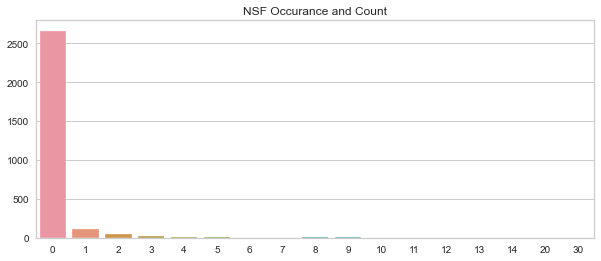

In [188]:
NSFType = merge1.NSFcount.value_counts()
sns.set_style("whitegrid")
plt.figure(figsize=(10,4))
plt.title("NSF Occurance and Count")
sns.barplot(x=NSFType.index, y=NSFType.values)
plt.show()

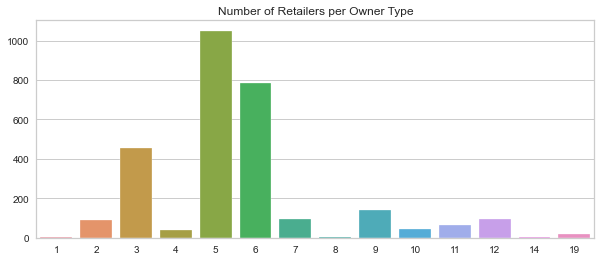

In [189]:
BizType = merge1['Business Type'].value_counts()
sns.set_style("whitegrid")
plt.figure(figsize=(10,4))
plt.title("Number of Retailers per Owner Type")
sns.barplot(x=BizType.index, y=BizType.values)
plt.show()

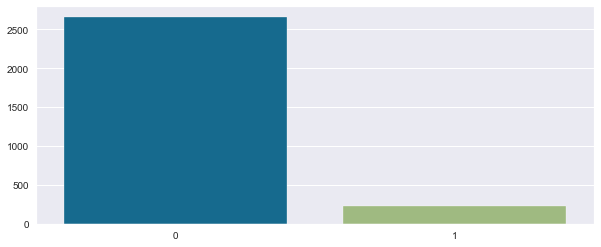

In [190]:
nsf = merge1.NSFhis.value_counts()
sns.set_style("darkgrid")
plt.figure(figsize=(10,4))
sns.barplot(x=nsf.index, y=nsf.values)
plt.show()

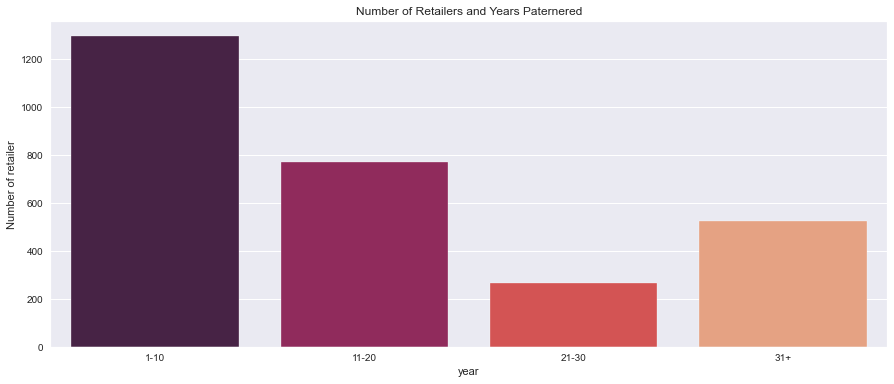

In [191]:
year1_10 = merge1.Year_Partered[(merge1.Year_Partered <= 10) & (merge1.Year_Partered >= 1)]
year11_20 = merge1.Year_Partered[(merge1.Year_Partered <= 20) & (merge1.Year_Partered >= 11)]
year21_30 = merge1.Year_Partered[(merge1.Year_Partered <= 30) & (merge1.Year_Partered >= 21)]
year31above = merge1.Year_Partered[merge1.Year_Partered >= 31]

x = ["1-10","11-20","21-30","31+"]
y = [len(year1_10.values),len(year11_20.values),len(year21_30.values),len(year31above.values)]

plt.figure(figsize=(15,6))
sns.barplot(x=x, y=y, palette="rocket")
plt.title("Number of Retailers and Years Paternered")
plt.xlabel("year")
plt.ylabel("Number of retailer")
plt.show()

In [192]:
merge1[['OwnerType', 'AvgSweepAmount']].groupby(['OwnerType'], as_index=False).mean().sort_values(by='AvgSweepAmount', ascending=False)

,OwnerType,AvgSweepAmount
4,6,3272.860084
0,1,2973.956168
3,4,2940.220220
1,2,2058.214135
2,3,1188.760520


In [193]:
merge1[['Business Type', 'Draw Sales']].groupby(['Business Type'], as_index=False).sum().sort_values(by='Draw Sales', ascending=False)

,Business Type,Draw Sales
4,5,2.209168e+06
2,3,1.691152e+06
5,6,8.144315e+05
8,9,1.308543e+05
9,10,5.873083e+04
11,12,3.871929e+04
3,4,3.465751e+04
1,2,3.463750e+04
6,7,3.358486e+04
10,11,2.731214e+04


In [198]:
merge1[['Business Type', 'Draw Sales']].groupby(['Business Type'], as_index=False).mean().sort_values(by='Draw Sales', ascending=False)

,Business Type,Draw Sales
2,3,3700.551345
4,5,2103.969424
9,10,1365.833228
5,6,1040.142380
8,9,934.673393
3,4,866.437638
0,1,519.903409
11,12,416.336421
13,19,414.961306
10,11,413.820231


In [201]:
merge1[['Business Type', 'Scratchers Settlements','Draw Sales']].groupby(['Business Type'], as_index=False).mean().sort_values(by='Scratchers Settlements', ascending=False)

,Business Type,Scratchers Settlements,Draw Sales
2,3,8014.536097,3700.551345
4,5,6488.599489,2103.969424
13,19,5706.165099,414.961306
5,6,3459.148438,1040.142380
9,10,3354.935709,1365.833228
8,9,3002.745274,934.673393
3,4,2896.307845,866.437638
6,7,2423.576066,361.127548
12,14,1875.774655,314.806949
1,2,1752.240843,380.631888


In [200]:
b.to_csv('business sale.csv')

In [197]:
merge1[['Business Type', 'Scratchers Settlements']].groupby(['Business Type'], as_index=False).mean().sort_values(by='Scratchers Settlements', ascending=False)

,Business Type,Scratchers Settlements
2,3,8014.536097
4,5,6488.599489
13,19,5706.165099
5,6,3459.148438
9,10,3354.935709
8,9,3002.745274
3,4,2896.307845
6,7,2423.576066
12,14,1875.774655
1,2,1752.240843


In [202]:
merge1[['County', 'AvgSweepAmount']].groupby(['County'], as_index=False).mean().sort_values(by='AvgSweepAmount', ascending=False)

,County,AvgSweepAmount
7,Maricopa,3242.915726
8,Mohave,3148.215624
11,Pinal,2900.718653
12,Santa Cruz,2798.110113
1,Cochise,2760.431843
10,Pima,2664.592616
5,Greenlee,2579.951329
13,Yavapai,2380.531965
4,Graham,2148.400466
3,Gila,1975.598836


In [203]:
merge1[['OwnerType', 'Total_weekly_sweep']].groupby(['OwnerType'], as_index=False).mean().sort_values(by='Total_weekly_sweep', ascending=False)

,OwnerType,Total_weekly_sweep
1,2,113.666667
3,4,102.806931
0,1,96.918199
4,6,91.500000
2,3,89.833333


In [204]:
merge1[['NSFhis', 'Draw Sales','Scratchers Settlements']].groupby(['NSFhis'], as_index=False).mean().sort_values(by='NSFhis', ascending=False)

,NSFhis,Draw Sales,Scratchers Settlements
1,1,665.244303,3006.598092
0,0,1854.113922,5236.252381


In [220]:
merge1[['NSFhis', 'AvgSweepAmountp']].groupby(['NSFhis'], as_index=False).mean().sort_values(by='Total_weekly_sweep', ascending=False)

KeyError: "['AvgSweepAmountp'] not in index"

In [206]:
merge1.columns

Index(['RetailerNum', 'AvgSweepAmount', 'Total_weekly_sweep', 'Draw Sales',
       'Scratchers Settlements', 'NSFhis', 'NSFcount', 'NumofTerminals',
       'OwnerType', 'Business Type', 'County', 'RetailerStatus',
       'Year_Partered'],
      dtype='object')

In [207]:
ohe_df=pd.get_dummies(merge1['OwnerType'])

In [209]:
biz=pd.get_dummies(merge1['Business Type'])

In [210]:
biz.columns=['biz1','biz2','biz3','biz4','biz5','biz6','biz7','biz8','biz9','biz10',
            'biz11','biz12','biz14','biz19']

In [211]:
dum=pd.get_dummies(merge1['County'])

In [212]:
ohe_df.shape

(2885, 5)

In [213]:
dum.shape

(2885, 15)

In [214]:
merge1.shape

(2885, 13)

In [215]:
merge1.head()

,RetailerNum,AvgSweepAmount,Total_weekly_sweep,Draw Sales,Scratchers Settlements,NSFhis,NSFcount,NumofTerminals,OwnerType,Business Type,County,RetailerStatus,Year_Partered
0,10009,10065.459840,125,8773.720000,25044.000000,0,0,3,4,3,Maricopa,1,33
1,10024,2435.571441,111,1636.720721,3075.675676,0,0,2,1,5,Maricopa,1,17
2,10029,1863.674000,120,1153.566667,2207.500000,0,0,2,1,5,Maricopa,1,17
3,10033,9440.551680,125,9424.840000,16058.400000,0,0,3,4,3,Maricopa,1,33
4,10034,4037.053120,125,3442.544000,3955.200000,0,0,2,1,6,Maricopa,1,17


In [216]:
merge1 = merge1.join(ohe_df)
merge1 = merge1.join(dum)

In [217]:
merge1 = merge1.join(biz)

In [218]:
merge1.head()

,RetailerNum,AvgSweepAmount,Total_weekly_sweep,Draw Sales,Scratchers Settlements,NSFhis,NSFcount,NumofTerminals,OwnerType,Business Type,...,biz5,biz6,biz7,biz8,biz9,biz10,biz11,biz12,biz14,biz19
0,10009,10065.459840,125,8773.720000,25044.000000,0,0,3,4,3,...,0,0,0,0,0,0,0,0,0,0
1,10024,2435.571441,111,1636.720721,3075.675676,0,0,2,1,5,...,1,0,0,0,0,0,0,0,0,0
2,10029,1863.674000,120,1153.566667,2207.500000,0,0,2,1,5,...,1,0,0,0,0,0,0,0,0,0
3,10033,9440.551680,125,9424.840000,16058.400000,0,0,3,4,3,...,0,0,0,0,0,0,0,0,0,0
4,10034,4037.053120,125,3442.544000,3955.200000,0,0,2,1,6,...,0,1,0,0,0,0,0,0,0,0


In [219]:
merge1.drop(['OwnerType','Business Type','RetailerNum'],axis=1,inplace=True)

In [226]:
merge1.drop(['County'],axis=1,inplace=True)

In [227]:
merge1.columns=[        'AvgSweepAmount',     'Total_weekly_sweep',
                   'Draw Sales', 'Scratchers Settlements',
                       'NSFhis',               'NSFcount',
               'NumofTerminals',         'RetailerStatus',
                'Year_Partered',                        'own1',
                              'own2',                        'own3',
                             'own4',                       'own6',
                       'Apache',                'Cochise',
                     'Coconino',                   'Gila',
                       'Graham',               'Greenlee',
                       'La Paz',               'Maricopa',
                       'Mohave',                 'Navajo',
                         'Pima',                  'Pinal',
                   'Santa Cruz',                'Yavapai',
                         'Yuma',                   'biz1',
                         'biz2',                   'biz3',
                         'biz4',                   'biz5',
                         'biz6',                   'biz7',
                         'biz8',                   'biz9',
                        'biz10',                  'biz11',
                        'biz12',                  'biz14',
                        'biz19']

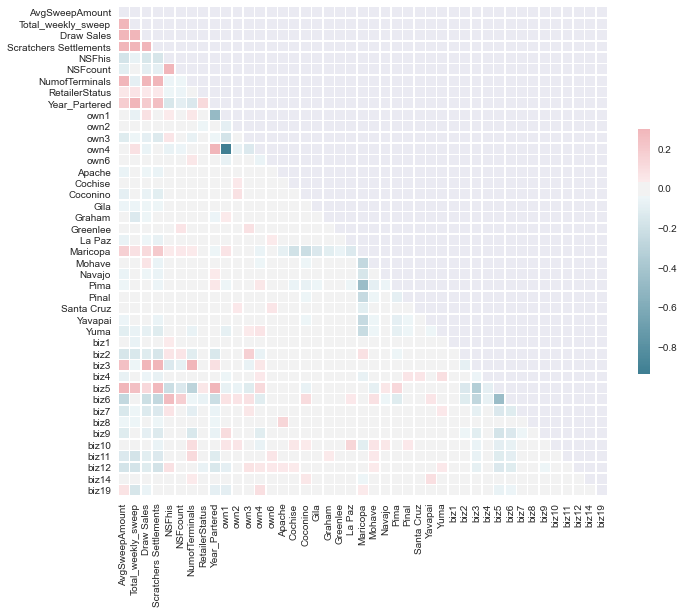

In [228]:

def plot_corr(df):
    corr = df.corr()
    mask = np.zeros_like(corr, dtype=np.bool)
    mask[np.triu_indices_from(mask)] = True
    f, ax = plt.subplots(figsize=(11, 9))
    cmap = sns.diverging_palette(220, 10, as_cmap=True)
    sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
                square=True, linewidths=.5, cbar_kws={"shrink": .5})

plot_corr(merge1)

In [229]:
scaled_features = merge1.copy()

In [230]:
from sklearn.preprocessing import MinMaxScaler
col_names = scaled_features.columns
features = scaled_features[col_names]
scaler = MinMaxScaler().fit(features.values)
features = scaler.transform(features.values)

In [231]:
features.shape

(2885, 43)

In [232]:
outliers = []

# For each feature find the data points with extreme high or low values
for feature in scaled_features.keys():
    
   # Calculate Q1 (25th percentile of the data) for the given feature
    Q1 = np.percentile(scaled_features[feature],25)
    
    # Calculate Q3 (75th percentile of the data) for the given feature
    Q3 = np.percentile(scaled_features[feature],75)
    
    # Use the interquartile range to calculate an outlier step (1.5 times the interquartile range)
    step = 1.5 * (Q3-Q1)
    
    # Display the outliers
    print("Data points considered outliers for the feature '{}':".format(feature))
    display(scaled_features[~((scaled_features[feature] >= Q1 - step) & (scaled_features[feature] <= Q3 + step))])
    lista = scaled_features[~((scaled_features[feature] >= Q1 - step) & (scaled_features[feature] <= Q3 + step))].index.tolist()
    outliers.append(lista)

Data points considered outliers for the feature 'AvgSweepAmount':


,AvgSweepAmount,Total_weekly_sweep,Draw Sales,Scratchers Settlements,NSFhis,NSFcount,NumofTerminals,RetailerStatus,Year_Partered,own1,...,biz5,biz6,biz7,biz8,biz9,biz10,biz11,biz12,biz14,biz19
0,10065.459840,125,8773.720000,25044.000000,0,0,3,1,33,0,...,0,0,0,0,0,0,0,0,0,0
3,9440.551680,125,9424.840000,16058.400000,0,0,3,1,33,0,...,0,0,0,0,0,0,0,0,0,0
31,8915.319840,125,8577.624000,15331.216000,0,0,2,1,33,0,...,0,0,0,0,0,0,0,0,0,0
37,8673.171360,125,6156.784000,12456.000000,0,0,2,1,16,1,...,1,0,0,0,0,0,0,0,0,0
58,8557.460000,125,4712.072000,15746.400000,0,0,2,1,16,1,...,1,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2686,14894.939355,31,19801.516129,8883.870968,0,0,4,1,1,1,...,0,1,0,0,0,0,0,0,0,0
2722,11502.960000,1,239.000000,12900.000000,0,0,2,1,1,0,...,0,0,0,0,0,0,0,0,0,0
2725,16143.510000,1,294.000000,17700.000000,0,0,3,1,1,0,...,0,0,0,0,0,0,0,0,0,0
2726,10345.280000,1,243.000000,11100.000000,0,0,2,1,1,0,...,0,0,0,0,0,0,0,0,0,0


Data points considered outliers for the feature 'Total_weekly_sweep':


,AvgSweepAmount,Total_weekly_sweep,Draw Sales,Scratchers Settlements,NSFhis,NSFcount,NumofTerminals,RetailerStatus,Year_Partered,own1,...,biz5,biz6,biz7,biz8,biz9,biz10,biz11,biz12,biz14,biz19
1066,582.896842,38,61.236842,781.578947,0,0,1,1,5,0,...,0,0,0,0,0,0,0,0,0,0
1445,9.360000,1,10.000000,0.000000,0,0,1,1,3,0,...,0,0,0,0,0,0,0,0,0,1
1476,505.546176,34,14.411765,564.705882,0,0,1,1,3,0,...,0,0,0,0,0,0,0,1,0,0
1596,3017.588889,36,774.388889,3950.000000,0,0,2,1,2,1,...,0,0,0,0,0,0,0,0,0,0
1609,2273.248333,36,403.027778,2750.000000,0,0,3,1,2,1,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2892,525.370000,2,847.000000,0.000000,0,0,2,1,1,0,...,0,0,0,0,0,0,0,1,0,0
2893,15.520000,1,146.000000,0.000000,0,0,1,1,1,1,...,0,1,0,0,0,0,0,0,0,0
2894,189.750000,1,282.000000,0.000000,0,0,2,1,1,1,...,0,0,0,0,0,0,0,0,0,0
2895,4.680000,1,5.000000,0.000000,0,0,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0


Data points considered outliers for the feature 'Draw Sales':


,AvgSweepAmount,Total_weekly_sweep,Draw Sales,Scratchers Settlements,NSFhis,NSFcount,NumofTerminals,RetailerStatus,Year_Partered,own1,...,biz5,biz6,biz7,biz8,biz9,biz10,biz11,biz12,biz14,biz19
0,10065.459840,125,8773.720000,25044.000000,0,0,3,1,33,0,...,0,0,0,0,0,0,0,0,0,0
3,9440.551680,125,9424.840000,16058.400000,0,0,3,1,33,0,...,0,0,0,0,0,0,0,0,0,0
11,5363.192941,119,7145.705882,9733.613445,0,0,2,1,17,1,...,0,0,0,0,0,0,0,0,0,0
23,4579.470000,114,6098.201754,5707.894737,0,0,2,1,33,0,...,0,0,0,0,0,0,0,0,0,0
31,8915.319840,125,8577.624000,15331.216000,0,0,2,1,33,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2527,5497.403109,119,5686.352941,14349.579832,0,0,3,1,31,0,...,0,0,0,0,0,0,0,0,0,0
2528,13666.914880,125,12191.144000,27873.600000,0,0,3,1,31,0,...,0,0,0,0,0,0,0,0,0,0
2529,6342.358926,121,6670.066116,15156.198347,0,0,2,1,31,0,...,0,0,0,0,0,0,0,0,0,0
2531,7656.773475,118,7901.033898,19553.389831,0,0,3,1,31,0,...,0,0,0,0,0,0,0,0,0,0


Data points considered outliers for the feature 'Scratchers Settlements':


,AvgSweepAmount,Total_weekly_sweep,Draw Sales,Scratchers Settlements,NSFhis,NSFcount,NumofTerminals,RetailerStatus,Year_Partered,own1,...,biz5,biz6,biz7,biz8,biz9,biz10,biz11,biz12,biz14,biz19
0,10065.459840,125,8773.720000,25044.000000,0,0,3,1,33,0,...,0,0,0,0,0,0,0,0,0,0
3,9440.551680,125,9424.840000,16058.400000,0,0,3,1,33,0,...,0,0,0,0,0,0,0,0,0,0
20,4694.493770,122,4610.795082,13669.672131,0,0,3,1,33,0,...,0,0,0,0,0,0,0,0,0,0
31,8915.319840,125,8577.624000,15331.216000,0,0,2,1,33,0,...,0,0,0,0,0,0,0,0,0,0
32,6504.269748,119,8044.420168,14652.100840,0,0,2,1,16,1,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2530,6290.617826,115,4754.782609,21020.869565,0,0,3,1,31,0,...,0,0,0,0,0,0,0,0,0,0
2531,7656.773475,118,7901.033898,19553.389831,0,0,3,1,31,0,...,0,0,0,0,0,0,0,0,0,0
2598,11997.160000,2,138.000000,13800.000000,0,0,4,1,2,0,...,0,0,0,0,0,0,0,0,0,0
2725,16143.510000,1,294.000000,17700.000000,0,0,3,1,1,0,...,0,0,0,0,0,0,0,0,0,0


Data points considered outliers for the feature 'NSFhis':


,AvgSweepAmount,Total_weekly_sweep,Draw Sales,Scratchers Settlements,NSFhis,NSFcount,NumofTerminals,RetailerStatus,Year_Partered,own1,...,biz5,biz6,biz7,biz8,biz9,biz10,biz11,biz12,biz14,biz19
6,2546.188545,55,230.472727,3698.181818,1,1,1,1,17,0,...,0,1,0,0,0,0,0,0,0,0
27,456.491538,78,42.102564,815.384615,1,1,2,1,17,0,...,0,1,0,0,0,0,0,0,0,0
34,4188.278560,125,1976.784000,9232.800000,1,1,2,1,16,0,...,0,1,0,0,0,0,0,0,0,0
35,1947.229655,116,1421.879310,2415.517241,1,1,2,1,16,0,...,0,1,0,0,0,0,0,0,0,0
40,3308.257920,125,2260.872000,3938.400000,1,3,1,1,16,0,...,0,1,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2832,129.200667,15,291.733333,0.000000,1,1,2,1,1,0,...,0,0,0,0,0,0,0,1,0,0
2841,1099.620000,10,216.200000,1620.000000,1,1,1,1,1,0,...,0,0,0,0,0,0,1,0,0,0
2854,4294.006250,8,636.875000,4537.500000,1,1,2,1,1,1,...,0,1,0,0,0,0,0,0,0,0
2859,687.684000,5,12.600000,780.000000,1,1,1,1,1,1,...,0,1,0,0,0,0,0,0,0,0


Data points considered outliers for the feature 'NSFcount':


,AvgSweepAmount,Total_weekly_sweep,Draw Sales,Scratchers Settlements,NSFhis,NSFcount,NumofTerminals,RetailerStatus,Year_Partered,own1,...,biz5,biz6,biz7,biz8,biz9,biz10,biz11,biz12,biz14,biz19
6,2546.188545,55,230.472727,3698.181818,1,1,1,1,17,0,...,0,1,0,0,0,0,0,0,0,0
27,456.491538,78,42.102564,815.384615,1,1,2,1,17,0,...,0,1,0,0,0,0,0,0,0,0
34,4188.278560,125,1976.784000,9232.800000,1,1,2,1,16,0,...,0,1,0,0,0,0,0,0,0,0
35,1947.229655,116,1421.879310,2415.517241,1,1,2,1,16,0,...,0,1,0,0,0,0,0,0,0,0
40,3308.257920,125,2260.872000,3938.400000,1,3,1,1,16,0,...,0,1,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2832,129.200667,15,291.733333,0.000000,1,1,2,1,1,0,...,0,0,0,0,0,0,0,1,0,0
2841,1099.620000,10,216.200000,1620.000000,1,1,1,1,1,0,...,0,0,0,0,0,0,1,0,0,0
2854,4294.006250,8,636.875000,4537.500000,1,1,2,1,1,1,...,0,1,0,0,0,0,0,0,0,0
2859,687.684000,5,12.600000,780.000000,1,1,1,1,1,1,...,0,1,0,0,0,0,0,0,0,0


Data points considered outliers for the feature 'NumofTerminals':


,AvgSweepAmount,Total_weekly_sweep,Draw Sales,Scratchers Settlements,NSFhis,NSFcount,NumofTerminals,RetailerStatus,Year_Partered,own1,...,biz5,biz6,biz7,biz8,biz9,biz10,biz11,biz12,biz14,biz19
155,1398.588532,109,413.522936,4574.311927,0,0,4,1,15,0,...,0,1,0,0,0,0,0,0,0,0
1009,2069.457238,105,477.733333,4545.714286,0,0,4,1,6,1,...,0,0,0,0,0,0,1,0,0,0
1261,5894.499231,104,7404.326923,18602.884615,0,0,5,1,4,1,...,0,0,0,0,0,0,0,0,0,0
1324,6179.307030,101,7616.881188,17346.534653,0,0,4,1,3,1,...,0,0,0,0,0,0,0,0,0,0
1329,3179.547941,102,1379.274510,3911.764706,0,0,7,1,3,0,...,0,0,0,0,0,0,0,0,0,1
1459,5442.056235,85,7147.211765,19196.470588,0,0,4,1,3,1,...,0,0,0,0,0,0,0,0,0,0
1594,3214.272500,44,916.181818,3893.181818,0,0,4,1,2,1,...,0,0,0,0,0,0,0,0,0,0
1598,5796.930714,42,1297.928571,7428.571429,0,0,4,1,2,1,...,0,0,0,0,0,0,0,0,0,0
1605,1955.097111,45,538.822222,2393.333333,0,0,4,1,2,1,...,0,0,0,0,0,0,0,0,0,0
1791,7575.244463,121,10451.561983,15064.462810,0,0,4,1,26,0,...,0,0,0,0,0,0,0,0,0,0


Data points considered outliers for the feature 'RetailerStatus':


,AvgSweepAmount,Total_weekly_sweep,Draw Sales,Scratchers Settlements,NSFhis,NSFcount,NumofTerminals,RetailerStatus,Year_Partered,own1,...,biz5,biz6,biz7,biz8,biz9,biz10,biz11,biz12,biz14,biz19
61,3607.328835,103,3022.504854,5845.631068,0,0,2,0,0,1,...,0,0,0,0,0,0,0,0,0,0
234,1090.813956,91,218.208791,2531.868132,0,0,1,0,0,1,...,0,1,0,0,0,0,0,0,0,0
493,1314.234854,103,390.679612,3474.757282,0,0,1,0,0,0,...,0,1,0,0,0,0,0,0,0,0
498,2056.790261,115,590.000000,3594.782609,0,0,2,0,0,0,...,0,1,0,0,0,0,0,0,0,0
556,1769.758390,118,1241.991525,2298.305085,0,0,1,0,0,1,...,1,0,0,0,0,0,0,0,0,0
746,318.688190,116,297.870690,137.068966,0,0,1,0,0,1,...,0,0,0,0,0,0,0,1,0,0
782,1431.324330,97,263.247423,5251.546392,0,0,1,0,0,1,...,0,1,0,0,0,0,0,0,0,0
1035,2076.967049,122,1102.319672,3435.245902,1,8,1,0,0,1,...,0,1,0,0,0,0,0,0,0,0
1153,245.947375,80,85.725000,240.000000,1,1,1,0,0,1,...,0,0,0,0,0,0,0,1,0,0
1178,1271.120252,119,230.252101,3287.394958,1,3,1,0,0,1,...,0,1,0,0,0,0,0,0,0,0


Data points considered outliers for the feature 'Year_Partered':


,AvgSweepAmount,Total_weekly_sweep,Draw Sales,Scratchers Settlements,NSFhis,NSFcount,NumofTerminals,RetailerStatus,Year_Partered,own1,...,biz5,biz6,biz7,biz8,biz9,biz10,biz11,biz12,biz14,biz19


Data points considered outliers for the feature 'own1':


,AvgSweepAmount,Total_weekly_sweep,Draw Sales,Scratchers Settlements,NSFhis,NSFcount,NumofTerminals,RetailerStatus,Year_Partered,own1,...,biz5,biz6,biz7,biz8,biz9,biz10,biz11,biz12,biz14,biz19


Data points considered outliers for the feature 'own2':


,AvgSweepAmount,Total_weekly_sweep,Draw Sales,Scratchers Settlements,NSFhis,NSFcount,NumofTerminals,RetailerStatus,Year_Partered,own1,...,biz5,biz6,biz7,biz8,biz9,biz10,biz11,biz12,biz14,biz19
231,1377.923333,108,545.175926,3627.777778,0,0,1,1,14,0,...,0,0,0,0,1,0,0,0,0,0
292,1138.662083,96,545.239583,2046.875000,0,0,2,1,14,0,...,0,0,0,0,0,1,0,0,0,0
300,3188.612581,93,1297.806452,3848.387097,0,0,2,1,14,0,...,0,0,0,0,0,1,0,0,0,0
319,1893.739919,123,1522.975610,1936.585366,0,0,1,1,14,0,...,0,0,0,0,0,0,0,0,0,0
336,1260.966757,111,539.990991,2851.351351,0,0,1,1,13,0,...,0,1,0,0,0,0,0,0,0,0
493,1314.234854,103,390.679612,3474.757282,0,0,1,0,0,0,...,0,1,0,0,0,0,0,0,0,0
495,443.522358,123,537.170732,153.658537,0,0,1,1,12,0,...,0,1,0,0,0,0,0,0,0,0
583,1523.892069,116,617.465517,2609.482759,1,1,2,1,11,0,...,0,0,0,0,0,0,0,1,0,0
899,3158.647040,125,1212.216000,7077.600000,0,0,3,1,7,0,...,0,0,0,0,1,0,0,0,0,0
989,2975.067600,125,1970.824000,2865.600000,0,0,2,1,6,0,...,0,1,0,0,0,0,0,0,0,0


Data points considered outliers for the feature 'own3':


,AvgSweepAmount,Total_weekly_sweep,Draw Sales,Scratchers Settlements,NSFhis,NSFcount,NumofTerminals,RetailerStatus,Year_Partered,own1,...,biz5,biz6,biz7,biz8,biz9,biz10,biz11,biz12,biz14,biz19
46,5188.807120,125,4707.408000,4260.000000,0,0,1,1,16,0,...,0,1,0,0,0,0,0,0,0,0
109,874.252857,98,279.775510,2005.102041,0,0,1,1,16,0,...,0,1,0,0,0,0,0,0,0,0
181,964.844687,96,227.229167,2109.375000,0,0,1,1,15,0,...,0,1,0,0,0,0,0,0,0,0
197,678.209091,88,425.875000,896.590909,0,0,1,1,15,0,...,0,0,0,0,0,0,0,1,0,0
198,1994.663333,117,1251.444444,2764.102564,0,0,1,1,15,0,...,0,1,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2536,1206.086129,124,966.306452,1340.322581,0,0,1,1,30,0,...,0,1,0,0,0,0,0,0,0,0
2651,1047.573333,12,31.750000,1225.000000,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2681,979.571667,24,942.833333,1137.500000,1,3,2,1,1,0,...,0,0,0,0,0,0,0,0,0,0
2684,486.253158,19,65.105263,694.736842,0,0,1,1,1,0,...,0,0,0,0,0,0,0,1,0,0


Data points considered outliers for the feature 'own4':


,AvgSweepAmount,Total_weekly_sweep,Draw Sales,Scratchers Settlements,NSFhis,NSFcount,NumofTerminals,RetailerStatus,Year_Partered,own1,...,biz5,biz6,biz7,biz8,biz9,biz10,biz11,biz12,biz14,biz19


Data points considered outliers for the feature 'own6':


,AvgSweepAmount,Total_weekly_sweep,Draw Sales,Scratchers Settlements,NSFhis,NSFcount,NumofTerminals,RetailerStatus,Year_Partered,own1,...,biz5,biz6,biz7,biz8,biz9,biz10,biz11,biz12,biz14,biz19
187,2079.116852,108,2457.490741,3225.000000,0,0,2,1,33,0,...,0,0,0,0,0,0,0,0,0,0
462,5606.223162,117,6198.461538,12023.076923,0,0,2,1,29,0,...,0,0,0,0,0,0,0,0,0,0
672,1290.629211,114,524.850877,3197.368421,0,0,2,1,10,0,...,0,0,0,0,0,0,0,1,0,0
1920,5172.771667,102,6348.617647,13138.235294,0,0,3,1,21,0,...,0,0,0,0,0,0,0,0,0,0
1970,7001.688880,125,2916.240000,15912.000000,0,0,3,1,20,0,...,1,0,0,0,0,0,0,0,0,0
2140,4081.268618,123,2692.357724,6582.926829,0,0,1,1,19,0,...,1,0,0,0,0,0,0,0,0,0
2273,2549.367131,122,1462.795082,4527.049180,0,0,1,1,33,0,...,0,1,0,0,0,0,0,0,0,0
2498,3079.754000,125,2187.296000,3403.200000,0,0,1,1,32,0,...,1,0,0,0,0,0,0,0,0,0
2545,3717.018160,125,2319.344000,4879.200000,0,0,3,1,30,0,...,0,1,0,0,0,0,0,0,0,0
2685,705.880000,17,392.529412,952.941176,0,0,2,1,1,0,...,0,0,0,0,0,0,0,1,0,0


Data points considered outliers for the feature 'Apache':


,AvgSweepAmount,Total_weekly_sweep,Draw Sales,Scratchers Settlements,NSFhis,NSFcount,NumofTerminals,RetailerStatus,Year_Partered,own1,...,biz5,biz6,biz7,biz8,biz9,biz10,biz11,biz12,biz14,biz19
693,321.920519,77,76.064935,529.870130,0,0,1,1,10,0,...,0,0,0,0,0,0,0,1,0,0
721,847.791981,106,719.320755,908.490566,0,0,1,1,9,1,...,0,1,0,0,0,0,0,0,0,0
759,780.415269,93,315.827957,948.387097,0,0,1,1,9,1,...,0,1,0,0,0,0,0,0,0,0
1053,1036.220541,111,337.603604,1586.486486,0,0,1,1,6,0,...,0,0,0,1,0,0,0,0,0,0
1221,527.916429,98,275.306122,596.938776,1,1,1,1,4,1,...,0,1,0,0,0,0,0,0,0,0
1237,2749.010565,124,1053.653226,5762.903226,0,0,1,1,33,0,...,1,0,0,0,0,0,0,0,0,0
1267,2598.719187,123,882.422764,6521.951220,0,0,1,1,33,0,...,1,0,0,0,0,0,0,0,0,0
1641,364.599804,51,141.176471,611.764706,1,3,1,1,2,1,...,0,0,0,0,0,0,1,0,0,0
1893,807.320000,119,707.579832,811.764706,0,0,1,1,22,1,...,0,1,0,0,0,0,0,0,0,0
2021,1564.264528,106,1178.773585,2592.452830,0,0,2,1,33,0,...,0,0,0,0,0,0,0,0,0,0


Data points considered outliers for the feature 'Cochise':


,AvgSweepAmount,Total_weekly_sweep,Draw Sales,Scratchers Settlements,NSFhis,NSFcount,NumofTerminals,RetailerStatus,Year_Partered,own1,...,biz5,biz6,biz7,biz8,biz9,biz10,biz11,biz12,biz14,biz19
292,1138.662083,96,545.239583,2046.875000,0,0,2,1,14,0,...,0,0,0,0,0,1,0,0,0,0
333,554.048293,82,189.926829,914.634146,0,0,1,1,13,1,...,0,1,0,0,0,0,0,0,0,0
359,6660.986400,125,3641.648000,14796.000000,0,0,2,1,13,0,...,0,1,0,0,0,0,0,0,0,0
374,2102.073689,122,1128.967213,3130.327869,0,0,2,1,13,0,...,0,1,0,0,0,0,0,0,0,0
377,818.066173,81,418.111111,1211.111111,0,0,2,1,13,0,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2777,2462.328667,15,772.066667,7180.000000,0,0,1,1,1,1,...,1,0,0,0,0,0,0,0,0,0
2780,2075.022308,13,479.615385,4061.538462,0,0,1,1,1,1,...,1,0,0,0,0,0,0,0,0,0
2783,1916.254286,14,777.428571,4928.571429,0,0,1,1,1,1,...,1,0,0,0,0,0,0,0,0,0
2785,2227.060833,12,1039.916667,5125.000000,0,0,1,1,1,1,...,1,0,0,0,0,0,0,0,0,0


Data points considered outliers for the feature 'Coconino':


,AvgSweepAmount,Total_weekly_sweep,Draw Sales,Scratchers Settlements,NSFhis,NSFcount,NumofTerminals,RetailerStatus,Year_Partered,own1,...,biz5,biz6,biz7,biz8,biz9,biz10,biz11,biz12,biz14,biz19
83,641.233333,81,196.654321,859.259259,0,0,1,1,16,1,...,0,0,0,0,1,0,0,0,0,0
103,2528.387258,124,1648.475806,3007.258065,0,0,2,1,16,0,...,0,1,0,0,0,0,0,0,0,0
132,1167.567358,106,354.830189,2190.566038,0,0,1,1,16,0,...,0,1,0,0,0,0,0,0,0,0
143,2142.232410,83,3023.433735,6831.325301,0,0,2,1,33,0,...,0,0,0,0,0,0,0,0,0,0
147,2654.437864,103,2958.669903,8429.126214,0,0,2,1,33,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2738,1210.175000,14,462.857143,2057.142857,0,0,1,1,1,1,...,1,0,0,0,0,0,0,0,0,0
2751,1364.657778,18,615.277778,2733.333333,0,0,1,1,1,1,...,1,0,0,0,0,0,0,0,0,0
2752,1464.097692,13,451.692308,2146.153846,0,0,1,1,1,1,...,1,0,0,0,0,0,0,0,0,0
2753,2055.542143,14,420.142857,3514.285714,0,0,1,1,1,1,...,1,0,0,0,0,0,0,0,0,0


Data points considered outliers for the feature 'Gila':


,AvgSweepAmount,Total_weekly_sweep,Draw Sales,Scratchers Settlements,NSFhis,NSFcount,NumofTerminals,RetailerStatus,Year_Partered,own1,...,biz5,biz6,biz7,biz8,biz9,biz10,biz11,biz12,biz14,biz19
81,1925.956583,120,907.508333,3815.000000,0,0,3,1,16,1,...,0,1,0,0,0,0,0,0,0,0
123,2151.691613,62,772.177419,4214.516129,0,0,2,1,33,0,...,0,0,0,0,0,0,0,0,0,0
193,4546.706960,125,2737.016000,6928.800000,0,0,1,1,15,1,...,1,0,0,0,0,0,0,0,0,0
208,2926.136404,114,3681.280702,4778.947368,0,0,2,1,33,0,...,0,0,0,0,0,0,0,0,0,0
284,2552.984719,89,2260.764045,8413.483146,0,0,2,1,29,0,...,0,0,0,0,0,0,0,0,0,0
327,3106.038629,124,2013.346774,5160.483871,0,0,2,1,14,0,...,0,1,0,0,0,0,0,0,0,0
361,2018.747632,114,1125.517544,3939.473684,0,0,2,1,13,1,...,0,1,0,0,0,0,0,0,0,0
432,986.135413,109,426.669725,1442.201835,0,0,1,1,12,1,...,0,0,1,0,0,0,0,0,0,0
458,2122.771707,123,847.203252,4163.414634,0,0,1,1,12,1,...,0,0,1,0,0,0,0,0,0,0
650,1269.162407,108,245.092593,3361.111111,0,0,1,1,10,1,...,0,0,0,0,1,0,0,0,0,0


Data points considered outliers for the feature 'Graham':


,AvgSweepAmount,Total_weekly_sweep,Draw Sales,Scratchers Settlements,NSFhis,NSFcount,NumofTerminals,RetailerStatus,Year_Partered,own1,...,biz5,biz6,biz7,biz8,biz9,biz10,biz11,biz12,biz14,biz19
234,1090.813956,91,218.208791,2531.868132,0,0,1,0,0,1,...,0,1,0,0,0,0,0,0,0,0
1129,1578.309386,114,600.745614,3163.157895,1,1,1,1,5,1,...,0,1,0,0,0,0,0,0,0,0
1292,4321.827120,125,979.464000,10159.200000,0,0,1,1,33,0,...,1,0,0,0,0,0,0,0,0,0
1659,5485.158621,58,1656.172414,11555.172414,0,0,1,1,2,1,...,1,0,0,0,0,0,0,0,0,0
1745,800.775217,46,631.652174,2771.739130,0,0,2,1,26,0,...,0,0,0,0,0,0,0,0,0,0
1882,2022.099833,120,1432.366667,3970.000000,0,0,2,1,22,1,...,0,1,0,0,0,0,0,0,0,0
1969,1856.304356,101,915.762376,5373.267327,0,0,2,1,20,0,...,0,0,0,0,0,0,0,0,0,0
2230,4289.367120,125,1209.120000,10296.000000,0,0,1,1,33,0,...,1,0,0,0,0,0,0,0,0,0
2300,1389.060667,30,1992.900000,6290.000000,0,0,3,1,17,1,...,0,0,0,0,0,0,0,0,0,0
2620,1824.349250,40,220.600000,4267.500000,1,1,1,1,2,1,...,0,1,0,0,0,0,0,0,0,0


Data points considered outliers for the feature 'Greenlee':


,AvgSweepAmount,Total_weekly_sweep,Draw Sales,Scratchers Settlements,NSFhis,NSFcount,NumofTerminals,RetailerStatus,Year_Partered,own1,...,biz5,biz6,biz7,biz8,biz9,biz10,biz11,biz12,biz14,biz19
858,1384.601709,117,453.914530,2946.153846,0,0,1,1,8,0,...,0,1,0,0,0,0,0,0,0,0
1128,2455.898145,124,766.201613,6007.258065,1,13,1,1,5,1,...,0,1,0,0,0,0,0,0,0,0
1251,1768.060439,114,504.622807,5278.947368,0,0,2,1,4,0,...,0,0,0,0,1,0,0,0,0,0
1314,4805.625840,125,1330.648000,12040.800000,0,0,1,1,33,0,...,1,0,0,0,0,0,0,0,0,0
1719,1940.301739,115,409.878261,4077.391304,0,0,1,1,27,0,...,0,1,0,0,0,0,0,0,0,0
1829,3209.333837,86,2061.279070,5874.418605,0,0,2,1,24,0,...,0,1,0,0,0,0,0,0,0,0
1975,2495.837593,108,974.953704,6483.333333,0,0,2,1,20,1,...,0,0,0,0,0,0,0,0,0,0


Data points considered outliers for the feature 'La Paz':


,AvgSweepAmount,Total_weekly_sweep,Draw Sales,Scratchers Settlements,NSFhis,NSFcount,NumofTerminals,RetailerStatus,Year_Partered,own1,...,biz5,biz6,biz7,biz8,biz9,biz10,biz11,biz12,biz14,biz19
19,1589.397745,102,621.068627,2629.411765,0,0,2,1,17,1,...,1,0,0,0,0,0,0,0,0,0
205,1043.024182,110,698.381818,1017.272727,0,0,1,1,15,0,...,0,0,0,0,0,0,0,0,0,0
300,3188.612581,93,1297.806452,3848.387097,0,0,2,1,14,0,...,0,0,0,0,0,1,0,0,0,0
363,2012.491917,120,1083.100000,3117.500000,0,0,2,1,13,1,...,1,0,0,0,0,0,0,0,0,0
613,1937.797658,111,1203.306306,3394.594595,0,0,2,1,11,1,...,0,1,0,0,0,0,0,0,0,0
691,2525.531301,123,1522.853659,3414.634146,0,0,2,1,10,1,...,0,0,0,0,0,1,0,0,0,0
698,1211.128692,107,594.261682,2060.747664,0,0,2,1,10,1,...,0,1,0,0,0,0,0,0,0,0
728,1210.152079,101,656.455446,2073.267327,0,0,1,1,9,0,...,0,1,0,0,0,0,0,0,0,0
803,946.332525,99,639.959596,1369.696970,0,0,1,1,8,1,...,0,1,0,0,0,0,0,0,0,0
839,2078.559672,122,906.000000,4780.327869,1,1,1,1,8,0,...,0,1,0,0,0,0,0,0,0,0


Data points considered outliers for the feature 'Maricopa':


,AvgSweepAmount,Total_weekly_sweep,Draw Sales,Scratchers Settlements,NSFhis,NSFcount,NumofTerminals,RetailerStatus,Year_Partered,own1,...,biz5,biz6,biz7,biz8,biz9,biz10,biz11,biz12,biz14,biz19


Data points considered outliers for the feature 'Mohave':


,AvgSweepAmount,Total_weekly_sweep,Draw Sales,Scratchers Settlements,NSFhis,NSFcount,NumofTerminals,RetailerStatus,Year_Partered,own1,...,biz5,biz6,biz7,biz8,biz9,biz10,biz11,biz12,biz14,biz19
5,1150.909912,113,775.008850,1396.460177,0,0,1,1,17,1,...,0,0,0,0,1,0,0,0,0,0
16,2553.509113,124,1140.806452,3834.677419,0,0,2,1,17,0,...,1,0,0,0,0,0,0,0,0,0
62,1615.917563,119,958.890756,1948.739496,0,0,2,1,16,1,...,1,0,0,0,0,0,0,0,0,0
63,3858.014758,124,1855.854839,6844.354839,0,0,2,1,16,1,...,1,0,0,0,0,0,0,0,0,0
64,1805.911121,116,761.318966,2782.758621,0,0,2,1,16,0,...,1,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2693,240.491481,27,540.296296,0.000000,0,0,2,1,1,0,...,0,0,0,0,0,0,0,1,0,0
2703,2175.403103,29,2116.241379,1800.000000,0,0,1,1,1,0,...,0,1,0,0,0,0,0,0,0,0
2708,176.537647,17,90.235294,264.705882,0,0,2,1,1,0,...,0,0,0,0,0,0,0,1,0,0
2824,1349.267143,7,304.857143,1414.285714,1,2,1,1,1,0,...,0,0,0,0,0,0,0,1,0,0


Data points considered outliers for the feature 'Navajo':


,AvgSweepAmount,Total_weekly_sweep,Draw Sales,Scratchers Settlements,NSFhis,NSFcount,NumofTerminals,RetailerStatus,Year_Partered,own1,...,biz5,biz6,biz7,biz8,biz9,biz10,biz11,biz12,biz14,biz19
117,2946.480943,106,3681.471698,5773.584906,0,0,2,1,33,0,...,0,0,0,0,0,0,0,0,0,0
141,3937.279355,124,1593.991935,6945.967742,0,0,1,1,16,1,...,1,0,0,0,0,0,0,0,0,0
145,1853.590116,86,1440.581395,5720.930233,0,0,2,1,33,0,...,0,0,0,0,0,0,0,0,0,0
149,1381.297600,100,852.400000,2661.000000,0,0,2,1,33,0,...,0,0,0,0,0,0,0,0,0,0
427,846.866190,105,284.333333,1668.571429,0,0,1,1,12,1,...,0,1,0,0,0,0,0,0,0,0
441,2305.219754,122,1534.877049,3066.393443,0,0,1,1,12,1,...,1,0,0,0,0,0,0,0,0,0
521,1140.225833,96,741.395833,2743.750000,0,0,1,1,11,0,...,0,1,0,0,0,0,0,0,0,0
667,2820.283770,122,1932.180328,5023.770492,0,0,2,1,10,1,...,1,0,0,0,0,0,0,0,0,0
685,2416.962261,115,1456.913043,3607.826087,0,0,2,1,10,1,...,0,0,0,0,0,1,0,0,0,0
740,849.038205,78,175.269231,1319.230769,0,0,2,1,9,0,...,0,0,0,0,0,0,0,1,0,0


Data points considered outliers for the feature 'Pima':


,AvgSweepAmount,Total_weekly_sweep,Draw Sales,Scratchers Settlements,NSFhis,NSFcount,NumofTerminals,RetailerStatus,Year_Partered,own1,...,biz5,biz6,biz7,biz8,biz9,biz10,biz11,biz12,biz14,biz19
10,2134.589344,122,604.090164,2500.819672,0,0,2,1,13,1,...,0,0,0,0,0,0,0,0,0,0
44,960.725100,100,283.500000,1152.000000,1,1,2,1,16,1,...,0,0,0,0,0,0,0,0,0,0
76,4735.555868,121,5045.859504,8883.471074,0,0,2,1,33,0,...,0,0,0,0,0,0,0,0,0,0
79,3071.879739,115,3144.973913,5180.869565,0,0,2,1,33,0,...,0,0,0,0,0,0,0,0,0,0
85,2946.659573,117,2795.666667,5415.384615,0,0,2,1,33,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2841,1099.620000,10,216.200000,1620.000000,1,1,1,1,1,0,...,0,0,0,0,0,0,1,0,0,0
2843,1615.244000,5,2428.400000,4260.000000,0,0,2,1,1,0,...,1,0,0,0,0,0,0,0,0,0
2851,3034.270000,3,291.333333,3100.000000,0,0,3,1,1,0,...,0,0,0,0,0,0,0,0,0,0
2852,1664.938333,6,282.333333,1750.000000,0,0,3,1,1,0,...,0,0,0,0,0,0,0,0,0,0


Data points considered outliers for the feature 'Pinal':


,AvgSweepAmount,Total_weekly_sweep,Draw Sales,Scratchers Settlements,NSFhis,NSFcount,NumofTerminals,RetailerStatus,Year_Partered,own1,...,biz5,biz6,biz7,biz8,biz9,biz10,biz11,biz12,biz14,biz19
34,4188.278560,125,1976.784000,9232.800000,1,1,2,1,16,0,...,0,1,0,0,0,0,0,0,0,0
84,7526.127984,124,7742.774194,9212.903226,0,0,2,1,16,1,...,0,0,0,0,0,0,0,0,0,0
105,1667.027973,74,1607.837838,3920.270270,0,0,2,1,33,0,...,0,0,0,0,0,0,0,0,0,0
109,874.252857,98,279.775510,2005.102041,0,0,1,1,16,0,...,0,1,0,0,0,0,0,0,0,0
174,5846.122640,125,3894.064000,7994.400000,0,0,1,1,15,1,...,1,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2742,2335.296875,16,1002.250000,4706.250000,0,0,1,1,1,1,...,1,0,0,0,0,0,0,0,0,0
2743,2414.233889,18,936.666667,5633.333333,0,0,1,1,1,1,...,1,0,0,0,0,0,0,0,0,0
2758,1999.470625,16,1175.187500,3506.250000,0,0,1,1,1,1,...,1,0,0,0,0,0,0,0,0,0
2837,1074.312000,10,283.600000,2520.000000,0,0,2,1,1,0,...,0,0,0,0,0,0,0,1,0,0


Data points considered outliers for the feature 'Santa Cruz':


,AvgSweepAmount,Total_weekly_sweep,Draw Sales,Scratchers Settlements,NSFhis,NSFcount,NumofTerminals,RetailerStatus,Year_Partered,own1,...,biz5,biz6,biz7,biz8,biz9,biz10,biz11,biz12,biz14,biz19
9,4363.789919,124,3865.782258,4843.548387,0,0,2,1,17,0,...,0,0,0,0,0,0,0,0,0,0
12,1842.879083,120,1075.975000,2225.000000,0,0,2,1,17,1,...,0,0,0,0,0,0,0,0,0,0
43,2867.996880,125,1090.072000,4281.600000,0,0,2,1,16,0,...,0,1,0,0,0,0,0,0,0,0
187,2079.116852,108,2457.490741,3225.000000,0,0,2,1,33,0,...,0,0,0,0,0,0,0,0,0,0
390,2410.330161,124,2175.379032,2866.935484,0,0,2,1,13,1,...,0,1,0,0,0,0,0,0,0,0
606,1280.382823,124,1160.750000,1149.193548,0,0,1,1,11,1,...,0,1,0,0,0,0,0,0,0,0
815,3907.727280,125,3502.936000,3640.800000,0,0,1,1,8,1,...,1,0,0,0,0,0,0,0,0,0
817,1755.671391,115,1230.530435,3245.217391,0,0,2,1,8,1,...,0,1,0,0,0,0,0,0,0,0
1010,1521.757686,121,930.752066,2776.859504,0,0,1,1,6,0,...,0,1,0,0,0,0,0,0,0,0
1065,1310.300726,124,1051.927419,1454.032258,0,0,1,1,5,1,...,0,1,0,0,0,0,0,0,0,0


Data points considered outliers for the feature 'Yavapai':


,AvgSweepAmount,Total_weekly_sweep,Draw Sales,Scratchers Settlements,NSFhis,NSFcount,NumofTerminals,RetailerStatus,Year_Partered,own1,...,biz5,biz6,biz7,biz8,biz9,biz10,biz11,biz12,biz14,biz19
11,5363.192941,119,7145.705882,9733.613445,0,0,2,1,17,1,...,0,0,0,0,0,0,0,0,0,0
56,2891.081290,124,1326.532258,5644.354839,0,0,1,1,16,0,...,0,1,0,0,0,0,0,0,0,0
156,3276.787157,102,3670.343137,6408.823529,0,0,2,1,33,0,...,0,0,0,0,0,0,0,0,0,0
158,4851.554640,125,3781.104000,7603.200000,0,0,2,1,33,0,...,0,0,0,0,0,0,0,0,0,0
165,5917.476475,122,7446.696721,15285.245902,0,0,2,1,33,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2829,2449.060000,18,1144.833333,2816.666667,0,0,1,1,1,0,...,0,1,0,0,0,0,0,0,0,0
2833,117.286000,15,388.066667,0.000000,0,0,2,1,1,0,...,0,0,0,0,0,0,1,0,0,0
2834,1097.725000,8,126.000000,1275.000000,0,0,1,1,1,1,...,0,0,1,0,0,0,0,0,0,0
2848,5630.430000,2,208.500000,6000.000000,0,0,4,1,1,0,...,0,0,0,0,0,0,0,0,0,0


Data points considered outliers for the feature 'Yuma':


,AvgSweepAmount,Total_weekly_sweep,Draw Sales,Scratchers Settlements,NSFhis,NSFcount,NumofTerminals,RetailerStatus,Year_Partered,own1,...,biz5,biz6,biz7,biz8,biz9,biz10,biz11,biz12,biz14,biz19
6,2546.188545,55,230.472727,3698.181818,1,1,1,1,17,0,...,0,1,0,0,0,0,0,0,0,0
144,3067.869355,124,1918.556452,4599.193548,0,0,1,1,16,1,...,1,0,0,0,0,0,0,0,0,0
216,1270.393868,106,266.471698,5708.490566,0,0,1,1,15,0,...,0,0,0,0,0,0,0,0,0,0
260,3214.648879,116,3726.103448,5754.310345,0,0,2,1,14,1,...,0,0,0,0,0,0,0,0,0,0
264,2957.067757,107,2773.943925,5582.242991,0,0,2,1,14,1,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2813,1058.852143,14,388.642857,2014.285714,0,0,2,1,1,0,...,0,1,0,0,0,0,0,0,0,0
2820,112.438824,17,241.705882,0.000000,0,0,2,1,1,0,...,0,0,0,0,0,0,0,1,0,0
2828,304.627500,16,744.687500,0.000000,0,0,2,1,1,0,...,0,0,0,0,0,0,0,1,0,0
2835,172.497333,15,350.733333,0.000000,0,0,2,1,1,0,...,0,0,0,0,0,0,0,1,0,0


Data points considered outliers for the feature 'biz1':


,AvgSweepAmount,Total_weekly_sweep,Draw Sales,Scratchers Settlements,NSFhis,NSFcount,NumofTerminals,RetailerStatus,Year_Partered,own1,...,biz5,biz6,biz7,biz8,biz9,biz10,biz11,biz12,biz14,biz19
2714,548.900909,22,301.681818,586.363636,1,2,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0
2864,1483.822500,8,738.125000,1425.000000,0,0,2,1,1,1,...,0,0,0,0,0,0,0,0,0,0


Data points considered outliers for the feature 'biz2':


,AvgSweepAmount,Total_weekly_sweep,Draw Sales,Scratchers Settlements,NSFhis,NSFcount,NumofTerminals,RetailerStatus,Year_Partered,own1,...,biz5,biz6,biz7,biz8,biz9,biz10,biz11,biz12,biz14,biz19
172,2041.789675,123,1096.162602,2987.804878,0,0,1,1,15,1,...,0,0,0,0,0,0,0,0,0,0
237,1731.583333,120,818.350000,3545.000000,0,0,1,1,14,0,...,0,0,0,0,0,0,0,0,0,0
247,1114.405248,101,568.821782,2854.455446,0,0,1,1,14,1,...,0,0,0,0,0,0,0,0,0,0
319,1893.739919,123,1522.975610,1936.585366,0,0,1,1,14,0,...,0,0,0,0,0,0,0,0,0,0
323,954.229151,106,376.339623,1576.415094,0,0,1,1,14,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2884,17.220000,1,27.000000,0.000000,0,0,2,1,1,1,...,0,0,0,0,0,0,0,0,0,0
2885,20.365000,2,25.000000,0.000000,0,0,2,1,1,1,...,0,0,0,0,0,0,0,0,0,0
2890,9.430000,2,16.500000,0.000000,0,0,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0
2894,189.750000,1,282.000000,0.000000,0,0,2,1,1,1,...,0,0,0,0,0,0,0,0,0,0


Data points considered outliers for the feature 'biz3':


,AvgSweepAmount,Total_weekly_sweep,Draw Sales,Scratchers Settlements,NSFhis,NSFcount,NumofTerminals,RetailerStatus,Year_Partered,own1,...,biz5,biz6,biz7,biz8,biz9,biz10,biz11,biz12,biz14,biz19
0,10065.459840,125,8773.720000,25044.000000,0,0,3,1,33,0,...,0,0,0,0,0,0,0,0,0,0
3,9440.551680,125,9424.840000,16058.400000,0,0,3,1,33,0,...,0,0,0,0,0,0,0,0,0,0
10,2134.589344,122,604.090164,2500.819672,0,0,2,1,13,1,...,0,0,0,0,0,0,0,0,0,0
11,5363.192941,119,7145.705882,9733.613445,0,0,2,1,17,1,...,0,0,0,0,0,0,0,0,0,0
12,1842.879083,120,1075.975000,2225.000000,0,0,2,1,17,1,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2850,1546.815000,4,172.500000,1650.000000,0,0,3,1,1,0,...,0,0,0,0,0,0,0,0,0,0
2851,3034.270000,3,291.333333,3100.000000,0,0,3,1,1,0,...,0,0,0,0,0,0,0,0,0,0
2852,1664.938333,6,282.333333,1750.000000,0,0,3,1,1,0,...,0,0,0,0,0,0,0,0,0,0
2867,1589.556667,3,1885.666667,4400.000000,0,0,2,1,1,0,...,0,0,0,0,0,0,0,0,0,0


Data points considered outliers for the feature 'biz4':


,AvgSweepAmount,Total_weekly_sweep,Draw Sales,Scratchers Settlements,NSFhis,NSFcount,NumofTerminals,RetailerStatus,Year_Partered,own1,...,biz5,biz6,biz7,biz8,biz9,biz10,biz11,biz12,biz14,biz19
7,4303.142880,125,1849.096000,8844.000000,0,0,1,1,17,0,...,0,0,0,0,0,0,0,0,0,0
9,4363.789919,124,3865.782258,4843.548387,0,0,2,1,17,0,...,0,0,0,0,0,0,0,0,0,0
44,960.725100,100,283.500000,1152.000000,1,1,2,1,16,1,...,0,0,0,0,0,0,0,0,0,0
205,1043.024182,110,698.381818,1017.272727,0,0,1,1,15,0,...,0,0,0,0,0,0,0,0,0,0
216,1270.393868,106,266.471698,5708.490566,0,0,1,1,15,0,...,0,0,0,0,0,0,0,0,0,0
298,1276.261593,113,747.876106,2901.769912,0,0,2,1,14,1,...,0,0,0,0,0,0,0,0,0,0
573,3506.829919,124,2685.419355,4633.064516,0,0,2,1,12,0,...,0,0,0,0,0,0,0,0,0,0
706,554.310102,98,120.183673,1132.653061,0,0,1,1,10,0,...,0,0,0,0,0,0,0,0,0,0
709,726.408889,72,87.458333,1462.500000,0,0,1,1,10,0,...,0,0,0,0,0,0,0,0,0,0
810,384.457778,117,392.957265,197.435897,0,0,1,1,8,1,...,0,0,0,0,0,0,0,0,0,0


Data points considered outliers for the feature 'biz5':


,AvgSweepAmount,Total_weekly_sweep,Draw Sales,Scratchers Settlements,NSFhis,NSFcount,NumofTerminals,RetailerStatus,Year_Partered,own1,...,biz5,biz6,biz7,biz8,biz9,biz10,biz11,biz12,biz14,biz19


Data points considered outliers for the feature 'biz6':


,AvgSweepAmount,Total_weekly_sweep,Draw Sales,Scratchers Settlements,NSFhis,NSFcount,NumofTerminals,RetailerStatus,Year_Partered,own1,...,biz5,biz6,biz7,biz8,biz9,biz10,biz11,biz12,biz14,biz19


Data points considered outliers for the feature 'biz7':


,AvgSweepAmount,Total_weekly_sweep,Draw Sales,Scratchers Settlements,NSFhis,NSFcount,NumofTerminals,RetailerStatus,Year_Partered,own1,...,biz5,biz6,biz7,biz8,biz9,biz10,biz11,biz12,biz14,biz19
54,457.409762,84,107.845238,653.571429,1,1,1,1,16,0,...,0,0,1,0,0,0,0,0,0,0
204,1970.264359,117,627.615385,5633.333333,0,0,1,1,15,1,...,0,0,1,0,0,0,0,0,0,0
211,833.705214,117,334.059829,1335.897436,0,0,1,1,15,0,...,0,0,1,0,0,0,0,0,0,0
232,930.093000,100,355.670000,1779.000000,0,0,1,1,14,1,...,0,0,1,0,0,0,0,0,0,0
297,935.016196,92,357.097826,1972.826087,0,0,1,1,14,0,...,0,0,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2661,440.034444,27,83.962963,822.222222,1,4,1,1,1,1,...,0,0,1,0,0,0,0,0,0,0
2670,1070.292400,25,82.920000,2688.000000,0,0,1,1,1,1,...,0,0,1,0,0,0,0,0,0,0
2705,910.186957,23,207.565217,1995.652174,0,0,1,1,1,1,...,0,0,1,0,0,0,0,0,0,0
2834,1097.725000,8,126.000000,1275.000000,0,0,1,1,1,1,...,0,0,1,0,0,0,0,0,0,0


Data points considered outliers for the feature 'biz8':


,AvgSweepAmount,Total_weekly_sweep,Draw Sales,Scratchers Settlements,NSFhis,NSFcount,NumofTerminals,RetailerStatus,Year_Partered,own1,...,biz5,biz6,biz7,biz8,biz9,biz10,biz11,biz12,biz14,biz19
1053,1036.220541,111,337.603604,1586.486486,0,0,1,1,6,0,...,0,0,0,1,0,0,0,0,0,0
1378,197.433636,88,55.250000,190.909091,0,0,1,1,3,0,...,0,0,0,1,0,0,0,0,0,0
2641,454.242308,26,40.692308,484.615385,0,0,2,1,1,1,...,0,0,0,1,0,0,0,0,0,0
2668,108.752222,27,36.000000,144.444444,0,0,1,1,1,1,...,0,0,0,1,0,0,0,0,0,0


Data points considered outliers for the feature 'biz9':


,AvgSweepAmount,Total_weekly_sweep,Draw Sales,Scratchers Settlements,NSFhis,NSFcount,NumofTerminals,RetailerStatus,Year_Partered,own1,...,biz5,biz6,biz7,biz8,biz9,biz10,biz11,biz12,biz14,biz19
5,1150.909912,113,775.008850,1396.460177,0,0,1,1,17,1,...,0,0,0,0,1,0,0,0,0,0
60,2138.945120,125,1739.288000,2409.600000,0,0,1,1,16,1,...,0,0,0,0,1,0,0,0,0,0
69,3940.717760,125,2979.064000,5107.200000,0,0,1,1,16,1,...,0,0,0,0,1,0,0,0,0,0
83,641.233333,81,196.654321,859.259259,0,0,1,1,16,1,...,0,0,0,0,1,0,0,0,0,0
195,3240.419680,125,2029.880000,5112.000000,0,0,1,1,15,1,...,0,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2299,1130.626809,94,291.276596,2313.829787,0,0,1,1,17,1,...,0,0,0,0,1,0,0,0,0,0
2590,706.592941,34,224.411765,838.235294,0,0,1,1,2,1,...,0,0,0,0,1,0,0,0,0,0
2690,1399.025833,24,744.541667,2200.000000,0,0,2,1,1,1,...,0,0,0,0,1,0,0,0,0,0
2840,1246.442857,7,423.857143,1714.285714,0,0,1,1,1,1,...,0,0,0,0,1,0,0,0,0,0


Data points considered outliers for the feature 'biz10':


,AvgSweepAmount,Total_weekly_sweep,Draw Sales,Scratchers Settlements,NSFhis,NSFcount,NumofTerminals,RetailerStatus,Year_Partered,own1,...,biz5,biz6,biz7,biz8,biz9,biz10,biz11,biz12,biz14,biz19
292,1138.662083,96,545.239583,2046.875000,0,0,2,1,14,0,...,0,0,0,0,0,1,0,0,0,0
300,3188.612581,93,1297.806452,3848.387097,0,0,2,1,14,0,...,0,0,0,0,0,1,0,0,0,0
303,3682.488480,125,2587.592000,3211.200000,0,0,3,1,14,1,...,0,0,0,0,0,1,0,0,0,0
310,1621.911157,121,1480.132231,1043.801653,0,0,2,1,14,1,...,0,0,0,0,0,1,0,0,0,0
332,1552.005596,109,615.889908,2405.504587,0,0,2,1,14,0,...,0,0,0,0,0,1,0,0,0,0
356,2234.892079,101,1215.168317,3335.643564,0,0,2,1,13,1,...,0,0,0,0,0,1,0,0,0,0
366,2271.400579,121,1733.570248,3141.322314,0,0,2,1,13,1,...,0,0,0,0,0,1,0,0,0,0
574,1999.146364,99,1246.040404,2590.909091,0,0,2,1,11,1,...,0,0,0,0,0,1,0,0,0,0
627,2495.161150,113,1668.362832,4571.681416,0,0,2,1,10,1,...,0,0,0,0,0,1,0,0,0,0
639,3110.907339,124,2199.806452,3111.290323,0,0,2,1,10,1,...,0,0,0,0,0,1,0,0,0,0


Data points considered outliers for the feature 'biz11':


,AvgSweepAmount,Total_weekly_sweep,Draw Sales,Scratchers Settlements,NSFhis,NSFcount,NumofTerminals,RetailerStatus,Year_Partered,own1,...,biz5,biz6,biz7,biz8,biz9,biz10,biz11,biz12,biz14,biz19
53,875.008713,101,355.712871,2034.653465,0,0,2,1,16,1,...,0,0,0,0,0,0,1,0,0,0
467,1632.960690,116,350.077586,3069.827586,1,3,2,1,12,1,...,0,0,0,0,0,0,1,0,0,0
594,1369.253704,108,269.731481,2991.666667,0,0,2,1,11,0,...,0,0,0,0,0,0,1,0,0,0
602,737.167011,87,243.850575,1351.724138,0,0,1,1,11,0,...,0,0,0,0,0,0,1,0,0,0
753,1352.149273,110,350.563636,3861.818182,0,0,2,1,9,0,...,0,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2841,1099.620000,10,216.200000,1620.000000,1,1,1,1,1,0,...,0,0,0,0,0,0,1,0,0,0
2846,100.021000,10,307.500000,0.000000,0,0,2,1,1,1,...,0,0,0,0,0,0,1,0,0,0
2879,172.700000,1,377.000000,0.000000,0,0,2,1,1,1,...,0,0,0,0,0,0,1,0,0,0
2880,165.896667,3,206.666667,0.000000,0,0,2,1,1,1,...,0,0,0,0,0,0,1,0,0,0


Data points considered outliers for the feature 'biz12':


,AvgSweepAmount,Total_weekly_sweep,Draw Sales,Scratchers Settlements,NSFhis,NSFcount,NumofTerminals,RetailerStatus,Year_Partered,own1,...,biz5,biz6,biz7,biz8,biz9,biz10,biz11,biz12,biz14,biz19
75,604.724659,88,345.443182,606.818182,0,0,1,1,16,1,...,0,0,0,0,0,0,0,1,0,0
107,956.780208,96,302.468750,2390.625000,0,0,1,1,16,1,...,0,0,0,0,0,0,0,1,0,0
197,678.209091,88,425.875000,896.590909,0,0,1,1,15,0,...,0,0,0,0,0,0,0,1,0,0
222,290.069892,93,165.064516,270.967742,1,4,1,1,15,0,...,0,0,0,0,0,0,0,1,0,0
291,2727.099098,122,1175.196721,9268.032787,1,1,2,1,14,0,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2878,272.400000,1,563.000000,0.000000,0,0,1,1,1,0,...,0,0,0,0,0,0,0,1,0,0
2881,16.396667,3,24.666667,0.000000,1,1,1,1,1,1,...,0,0,0,0,0,0,0,1,0,0
2883,71.366000,5,163.000000,0.000000,0,0,2,1,1,1,...,0,0,0,0,0,0,0,1,0,0
2886,119.132500,4,132.250000,0.000000,0,0,2,1,1,0,...,0,0,0,0,0,0,0,1,0,0


Data points considered outliers for the feature 'biz14':


,AvgSweepAmount,Total_weekly_sweep,Draw Sales,Scratchers Settlements,NSFhis,NSFcount,NumofTerminals,RetailerStatus,Year_Partered,own1,...,biz5,biz6,biz7,biz8,biz9,biz10,biz11,biz12,biz14,biz19
590,670.248289,76,216.368421,943.421053,0,0,1,1,11,0,...,0,0,0,0,0,0,0,0,1,0
591,1508.488058,103,426.252427,2469.902913,0,0,3,1,11,0,...,0,0,0,0,0,0,0,0,1,0
1046,1112.412400,100,301.800000,2214.000000,0,0,3,1,6,1,...,0,0,0,0,0,0,0,0,1,0


Data points considered outliers for the feature 'biz19':


,AvgSweepAmount,Total_weekly_sweep,Draw Sales,Scratchers Settlements,NSFhis,NSFcount,NumofTerminals,RetailerStatus,Year_Partered,own1,...,biz5,biz6,biz7,biz8,biz9,biz10,biz11,biz12,biz14,biz19
1229,9023.137419,124,6909.951613,14049.193548,0,0,3,1,4,0,...,0,0,0,0,0,0,0,0,0,1
1329,3179.547941,102,1379.274510,3911.764706,0,0,7,1,3,0,...,0,0,0,0,0,0,0,0,0,1
1445,9.360000,1,10.000000,0.000000,0,0,1,1,3,0,...,0,0,0,0,0,0,0,0,0,1
2552,7355.333333,18,0.000000,7866.666667,0,0,1,1,2,0,...,0,0,0,0,0,0,0,0,0,1
2553,5893.421875,32,0.000000,6946.875000,0,0,1,1,2,0,...,0,0,0,0,0,0,0,0,0,1
2554,6211.906250,32,0.000000,6656.250000,0,0,1,1,2,0,...,0,0,0,0,0,0,0,0,0,1
2555,4828.000000,33,0.000000,5418.181818,0,0,1,1,2,0,...,0,0,0,0,0,0,0,0,0,1
2566,6577.725000,26,0.000000,7719.230769,0,0,1,1,2,0,...,0,0,0,0,0,0,0,0,0,1
2567,4539.000000,22,0.000000,4854.545455,0,0,1,1,2,0,...,0,0,0,0,0,0,0,0,0,1
2568,5070.250000,22,0.000000,5618.181818,0,0,1,1,2,0,...,0,0,0,0,0,0,0,0,0,1


In [233]:
# Detecting outliers that appear in more than one product
seen = {}
dupes = []

for lista in outliers:
    for index in lista:
        if index not in seen:
            seen[index] = 1
        else:
            if seen[index] == 1:
                dupes.append(index)
            seen[index] += 1
dupes = sorted(dupes)

In [234]:
scaled_features = scaled_features.drop(dupes, axis=0).reset_index(drop=True)

In [235]:
from sklearn.cluster import KMeans
Sum_of_squared_distances = []
K = range(1,15)
for k in K:
    km = KMeans(n_clusters=k)
    km = km.fit(scaled_features)
    Sum_of_squared_distances.append(km.inertia_)

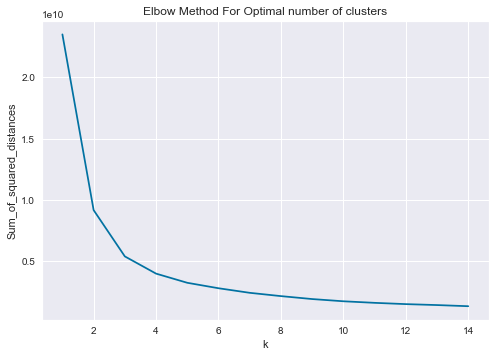

In [236]:
plt.plot(K, Sum_of_squared_distances, 'bx-')
plt.xlabel('k')
plt.ylabel('Sum_of_squared_distances')
plt.title('Elbow Method For Optimal number of clusters')
plt.show()
#k=4

/Users/bingyandu/anaconda3/lib/python3.6/site-packages/yellowbrick/utils/kneed.py:182: YellowbrickWarning: No "knee" or "elbow point" detected This could be due to bad clustering, no actual clusters being formed etc.
  warnings.warn(warning_message, YellowbrickWarning)
/Users/bingyandu/anaconda3/lib/python3.6/site-packages/yellowbrick/utils/kneed.py:140: YellowbrickWarning: No 'knee' or 'elbow point' detected This could be due to bad clustering, no actual clusters being formed etc.
  warnings.warn(warning_message, YellowbrickWarning)
/Users/bingyandu/anaconda3/lib/python3.6/site-packages/yellowbrick/cluster/elbow.py:343: YellowbrickWarning: No 'knee' or 'elbow' point detected, pass `locate_elbow=False` to remove the warning
  warnings.warn(warning_message, YellowbrickWarning)


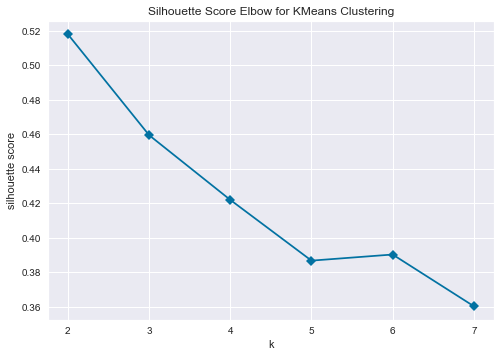

In [237]:
# Import the KElbowVisualizer method 
from yellowbrick.cluster import KElbowVisualizer

# Instantiate a scikit-learn K-Means model
model = KMeans(random_state=0)

# Instantiate the KElbowVisualizer with the number of clusters and the metric 
visualizer = KElbowVisualizer(model, k=(2,8), metric='silhouette', timings=False)

# Fit the data and visualize
visualizer.fit(scaled_features)    
visualizer.poof()   

In [246]:
kmeans = KMeans(n_clusters=3, random_state=0).fit(scaled_features)

In [242]:
# Get the cluster centroids
print(kmeans.cluster_centers_)
    
# Get the cluster labels
print(kmeans.labels_)

[[ 1.17778353e+03  9.49895652e+01  5.74185079e+02  1.92984709e+03
   0.00000000e+00  0.00000000e+00  1.28695652e+00  9.96521739e-01
   1.06417391e+01  6.33043478e-01  1.73913043e-03  1.39130435e-02
   3.51304348e-01  7.15573434e-18  5.21739130e-03  1.91304348e-02
   6.60869565e-02  6.95652174e-03  2.86229374e-17  1.43114687e-17
   2.43478261e-02  6.46956522e-01  3.47826087e-02  1.73913043e-02
   6.43478261e-02  2.43478261e-02  6.95652174e-03  5.21739130e-02
   3.13043478e-02  0.00000000e+00  4.69565217e-02  2.78260870e-02
   5.21739130e-03  1.56521739e-01  5.61739130e-01  5.56521739e-02
   1.73913043e-03  7.82608696e-02  1.73913043e-03  1.91304348e-02
   4.52173913e-02  0.00000000e+00  0.00000000e+00]
 [ 4.34569196e+03  1.18396313e+02  2.47101040e+03  7.29815332e+03
   0.00000000e+00  0.00000000e+00  1.33870968e+00  1.00000000e+00
   1.88110599e+01  5.23041475e-01  2.16840434e-17  2.30414747e-03
   4.74654378e-01  5.42101086e-18 -8.67361738e-18  1.84331797e-02
  -3.15719673e-16  4.6082

In [247]:
# Calculate silhouette_score
from sklearn.metrics import silhouette_score

print(silhouette_score(scaled_features, kmeans.labels_))

0.4593707153980259


In [ ]:
kmeans.cluster_centers_.shape

Text(0.5, 1.0, 'Inertia of Cosine k-Means versus number of clusters')

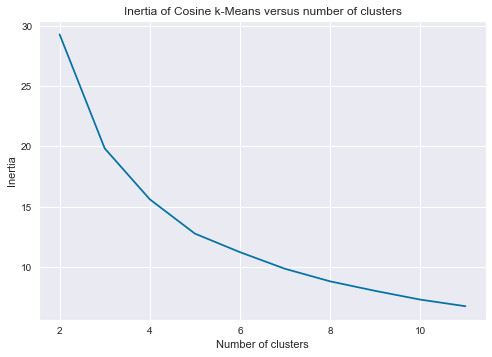

In [249]:
#nomalized kmeans
from sklearn import preprocessing
normalized_vectors = preprocessing.normalize(scaled_features)
scores = [KMeans(n_clusters=i+2).fit(normalized_vectors).inertia_ for i in range(10)]
sns.lineplot(np.arange(2, 12), scores)
plt.xlabel('Number of clusters')
plt.ylabel("Inertia")
plt.title("Inertia of Cosine k-Means versus number of clusters")

In [268]:
#normalized kmeans
normalized_kmeans = KMeans(n_clusters=4)
normalized_kmeans.fit(normalized_vectors)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=4, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [269]:
print('Cosine kmeans: {}'.format(silhouette_score(normalized_vectors, normalized_kmeans.labels_, metric='cosine')))

Cosine kmeans: 0.5516810255449152


In [270]:
scaled_features.columns

Index(['AvgSweepAmount', 'Total_weekly_sweep', 'Draw Sales',
       'Scratchers Settlements', 'NSFhis', 'NSFcount', 'NumofTerminals',
       'RetailerStatus', 'Year_Partered', 'own1', 'own2', 'own3', 'own4',
       'own6', 'Apache', 'Cochise', 'Coconino', 'Gila', 'Graham', 'Greenlee',
       'La Paz', 'Maricopa', 'Mohave', 'Navajo', 'Pima', 'Pinal', 'Santa Cruz',
       'Yavapai', 'Yuma', 'biz1', 'biz2', 'biz3', 'biz4', 'biz5', 'biz6',
       'biz7', 'biz8', 'biz9', 'biz10', 'biz11', 'biz12', 'biz14', 'biz19'],
      dtype='object')

In [271]:
cluster_features=[        'AvgSweepAmount',     'Total_weekly_sweep',
                   'Draw Sales', 'Scratchers Settlements',
                       'NSFhis',               'NSFcount',
               'NumofTerminals',         'RetailerStatus',
                'Year_Partered',                        'own1',
                              'own2',                        'own3',
                             'own4',                       'own6',
                       'Apache',                'Cochise',
                     'Coconino',                   'Gila',
                       'Graham',               'Greenlee',
                       'La Paz',               'Maricopa',
                       'Mohave',                 'Navajo',
                         'Pima',                  'Pinal',
                   'Santa Cruz',                'Yavapai',
                         'Yuma',                   'biz1',
                         'biz2',                   'biz3',
                         'biz4',                   'biz5',
                         'biz6',                   'biz7',
                         'biz8',                   'biz9',
                        'biz10',                  'biz11',
                        'biz12',                  'biz14',
                        'biz19']


In [272]:
num_clusters=4
scaled_features['cluster']=normalized_kmeans.labels_

In [ ]:
# bins = np.linspace(0,1,10)
# num_features = len(cluster_features)
# f, axes = plt.subplots(num_clusters, num_features,figsize=(20, 10), sharex='col')
# row = 0
# for cluster in np.sort(scaled_features['cluster'].unique()):
#     df_cluster = scaled_features[scaled_features['cluster'] == cluster]
#     col = 0
#     for feature in cluster_features:
#         rec_grp = scaled_features.groupby(pd.cut(scaled_features[feature], bins)).size().reset_index(name='count')
#         cluster_grp = df_cluster.groupby(pd.cut(df_cluster[feature], bins)).size().reset_index(name='count')

#         sns.barplot(data=rec_grp, x=feature, y='count', 
#                     color='grey', ax=axes[row,col])
#         sns.barplot(data=cluster_grp, x=feature, y='count', 
#                     color='pink', ax=axes[row,col])
#         axes[row,col].set_xlabel('')
#         axes[row,col].set_xticklabels(range(1,10))
#         if col > 0:
#             axes[row,col].set_ylabel('')
#         if row == 0:
#             axes[row,col].set_title(feature)
#         col += 1

#     row += 1
    
# f.suptitle('Profile for each clusters')
    
# plt.show()

In [273]:
# calculate mean of each variable
radar_col = cluster_features + ['cluster']

# feature average for each cluster as a radar chart
df_radar = scaled_features[radar_col]
df_radar = df_radar.groupby('cluster').mean().reset_index()
df_radar

,cluster,AvgSweepAmount,Total_weekly_sweep,Draw Sales,Scratchers Settlements,NSFhis,NSFcount,NumofTerminals,RetailerStatus,Year_Partered,...,biz5,biz6,biz7,biz8,biz9,biz10,biz11,biz12,biz14,biz19
0,0,3231.754970,111.930574,1737.963233,5485.483494,0.0,0.0,1.336449,1.000000,17.161549,...,0.612817,0.208278,0.010681,0.000000,0.050734,0.005340,0.005340,0.010681,0.0,0.0
1,1,3302.699589,114.342723,2303.291514,4343.452177,0.0,0.0,1.446009,0.997653,14.018779,...,0.509390,0.293427,0.002347,0.002347,0.051643,0.004695,0.002347,0.014085,0.0,0.0
2,2,2278.057334,105.505804,813.337277,5118.989765,0.0,0.0,1.278607,0.991708,17.053068,...,0.384743,0.431177,0.049751,0.000000,0.038143,0.001658,0.019900,0.004975,0.0,0.0
3,3,2078.346539,105.851852,1879.303877,1752.440088,0.0,0.0,1.314815,1.000000,9.981481,...,0.240741,0.444444,0.000000,0.000000,0.018519,0.018519,0.018519,0.185185,0.0,0.0


In [274]:
df_radar.to_csv('df_radar.csv')